In [19]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

In [20]:
%matplotlib inline
sys.path.append("..")

In [21]:
from utils import label_map_util
from utils import visualization_utils as vis_util

In [22]:
PATH_WEIGHT = 'ssd_mobilenet_v1_coco_11_06_2017' + '/frozen_inference_graph.pb'
PATH_LABELS = os.path.join('data', 'my_labels.pbtxt')
NUM_CLASSES = 9

In [23]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_WEIGHT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [24]:
label_map = label_map_util.load_labelmap(PATH_LABELS)
print(label_map)
categories = label_map_util.convert_label(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
print(categories)
category_index = label_map_util.create_category_index(categories)

item {
  name: "/m/02crq1"
  id: 1
  display_name: "sofa"
}
item {
  name: "/m/01mzpv"
  id: 2
  display_name: "chair"
}
item {
  name: "/m/04bcr3"
  id: 3
  display_name: "table"
}
item {
  name: "/m/040b_t"
  id: 4
  display_name: "refrigerator"
}
item {
  name: "/m/03ssj5"
  id: 5
  display_name: "bed"
}
item {
  name: "/m/07c52"
  id: 6
  display_name: "tv"
}
item {
  name: "/m/0cvnqh"
  id: 7
  display_name: "bench"
}
item {
  name: "/m/0bt9lr"
  id: 8
  display_name: "dog"
}
item {
  name: "/m/0199g"
  id: 9
  display_name: "bicycle"
}

[{'id': 63, 'name': u'sofa'}, {'id': 62, 'name': u'chair'}, {'id': 67, 'name': u'table'}, {'id': 82, 'name': u'refrigerator'}, {'id': 65, 'name': u'bed'}, {'id': 72, 'name': u'tv'}, {'id': 15, 'name': u'bench'}, {'id': 18, 'name': u'dog'}, {'id': 2, 'name': u'bicycle'}]


In [25]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [26]:
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 20) ]
IMAGE_SIZE = (36, 24)

[63 15 62 15  1 63 63 62 62 70 62 62 63  1 65 62 62 62 15 81 15 63 63 70
 63 81 62 67  1 63 62 57 63 70 62 62 62  1 63 81 57 63 63 57 62 63 70 63
 63 63 62 62 47 67 62 62 62  1 81  1 63 62 15  1 62 15 65 81 15 15 15 15
 58 63 81 63  1  1 62  1 81 70 62 62 62 62 57 63 70  1 62 63 15 81 62 62
 15 47 57 62]
[0.634545   0.18922211 0.08510022 0.06615294 0.06466534 0.06055624
 0.04846693 0.04709638 0.04389191 0.04327938 0.04167426 0.04070442
 0.04065797 0.04062195 0.04053474 0.03973403 0.03963354 0.03943029
 0.03643598 0.03546755 0.03486561 0.03398227 0.03354524 0.03278493
 0.03258906 0.03235    0.03179293 0.03009698 0.02933696 0.02914477
 0.0287856  0.02863067 0.02856304 0.02812072 0.02805697 0.02795956
 0.02748578 0.02709497 0.02707375 0.02706395 0.0267233  0.02642434
 0.02621239 0.02617418 0.02565136 0.02549626 0.0251183  0.02477814
 0.02476919 0.02474261 0.02462232 0.02395232 0.02349356 0.0234668
 0.02324827 0.0230404  0.02285403 0.02285325 0.02256544 0.02254471
 0.02252362 0.0224167  0.

[67  1 67 67 41  1  1 67 67 67  1 67 41 15 67 77 67  1 67 75 73 67 67 67
 67  1 67 67 41 15 67  1 75 67 62 62 62 67  1 67 75 67 62 67 84 67  1 62
 67 41 75  1 15 67 67  1  1 77 31 67 67 62 67 62 51 67 62 62  1 62 73  9
 67 62  1 41  1 62 15 62 84  1 82 62  1 75 67  1  1  1  1 75 62  1 67 15
  1 62  1 67]
[0.6734823  0.6318909  0.23466696 0.20532241 0.19118106 0.18901892
 0.15384468 0.15246576 0.10701673 0.10277241 0.09874839 0.09690385
 0.09555738 0.09245232 0.09095489 0.09031059 0.0900471  0.0897118
 0.08872852 0.08799256 0.08776864 0.08651676 0.08457896 0.0839407
 0.08383181 0.07964884 0.07952418 0.07832933 0.07653097 0.07539231
 0.07531088 0.07328727 0.073235   0.0716542  0.07122963 0.06635836
 0.06579017 0.06496359 0.06434949 0.06365745 0.06351723 0.06270006
 0.06147918 0.0610166  0.05992417 0.05943705 0.05938071 0.05931348
 0.05849199 0.05806157 0.05730992 0.05705662 0.05698206 0.05622815
 0.05619076 0.05513018 0.05329434 0.05322813 0.0531297  0.0531087
 0.0525439  0.05240699 0.05

[70 70 62 70 70 81 70 62 70 62 70 16 70 70 62 62 70 70 62 70 70 62 62 70
 62 70 70 62 70  1 62 81 62 62 62 70 70 62 62 70 70 62 70  1 62 62 70 62
 35 62 62 86 51  1 70 81  1 70 47 70 70  1 62 47 35 62 62 70 70 62 49 62
 70 47 70  1 62 70 49 62 86  1 62 15 70  1 70 47 62 62 47 62 70 62 62 47
 67 70  1 70]
[0.3401175  0.23461902 0.18819082 0.12924509 0.1022759  0.08863157
 0.08239981 0.08224464 0.08098952 0.0750728  0.07274193 0.07256519
 0.07135046 0.06839849 0.06822225 0.06574673 0.06092374 0.06075998
 0.06010474 0.05965039 0.05761614 0.05600788 0.05572077 0.05428181
 0.05427952 0.05412777 0.05083491 0.05079028 0.05064995 0.05018329
 0.04758391 0.04725016 0.04664656 0.04590703 0.04582462 0.04577219
 0.04570403 0.04523886 0.04504891 0.04466048 0.04443894 0.04429071
 0.04388164 0.04339254 0.04234144 0.04220527 0.04215918 0.04199664
 0.04198164 0.04171377 0.04167351 0.04134184 0.04123017 0.04096714
 0.0401919  0.04014147 0.03984163 0.03949549 0.03894865 0.03892061
 0.03857484 0.03781873 0

[31 40 33 73 65 65 28 31 73 31 31 65  1 15 48 32 15 15 32 31 31 33 65 15
 15 48 62 15 15 28  1 28 28  1 16 31  1 73 15 15  1 15  1  1 73 31 32 31
 31 31 62 84 32 48 15  1  1 52 73 62 73 33  1  1 31 44 15 31  1  1 62 62
  1 15 44 15  1 31  1 84 84 15  1 33 33 65 48  1 31 31 88 73 44 31  1 31
 40 65 28 32]
[0.2757529  0.21751963 0.20584577 0.10760994 0.10487572 0.07283176
 0.06782958 0.0662141  0.06609005 0.06547376 0.06414966 0.05422116
 0.05346546 0.05245959 0.04915652 0.04605811 0.04565764 0.0443785
 0.04404259 0.04376937 0.04332123 0.04015867 0.03979077 0.03902324
 0.03889009 0.03844858 0.03759148 0.03708577 0.03664604 0.03640817
 0.03628291 0.03613283 0.03579283 0.03545468 0.03540758 0.03463079
 0.03457477 0.034541   0.03453355 0.03440683 0.03431565 0.03358074
 0.03348966 0.033469   0.03339805 0.03311985 0.03289635 0.03278349
 0.03265361 0.0324798  0.0321245  0.03209781 0.03164232 0.03122862
 0.03081618 0.03004559 0.02989625 0.02875301 0.02860825 0.02825282
 0.02796096 0.02790735 0.

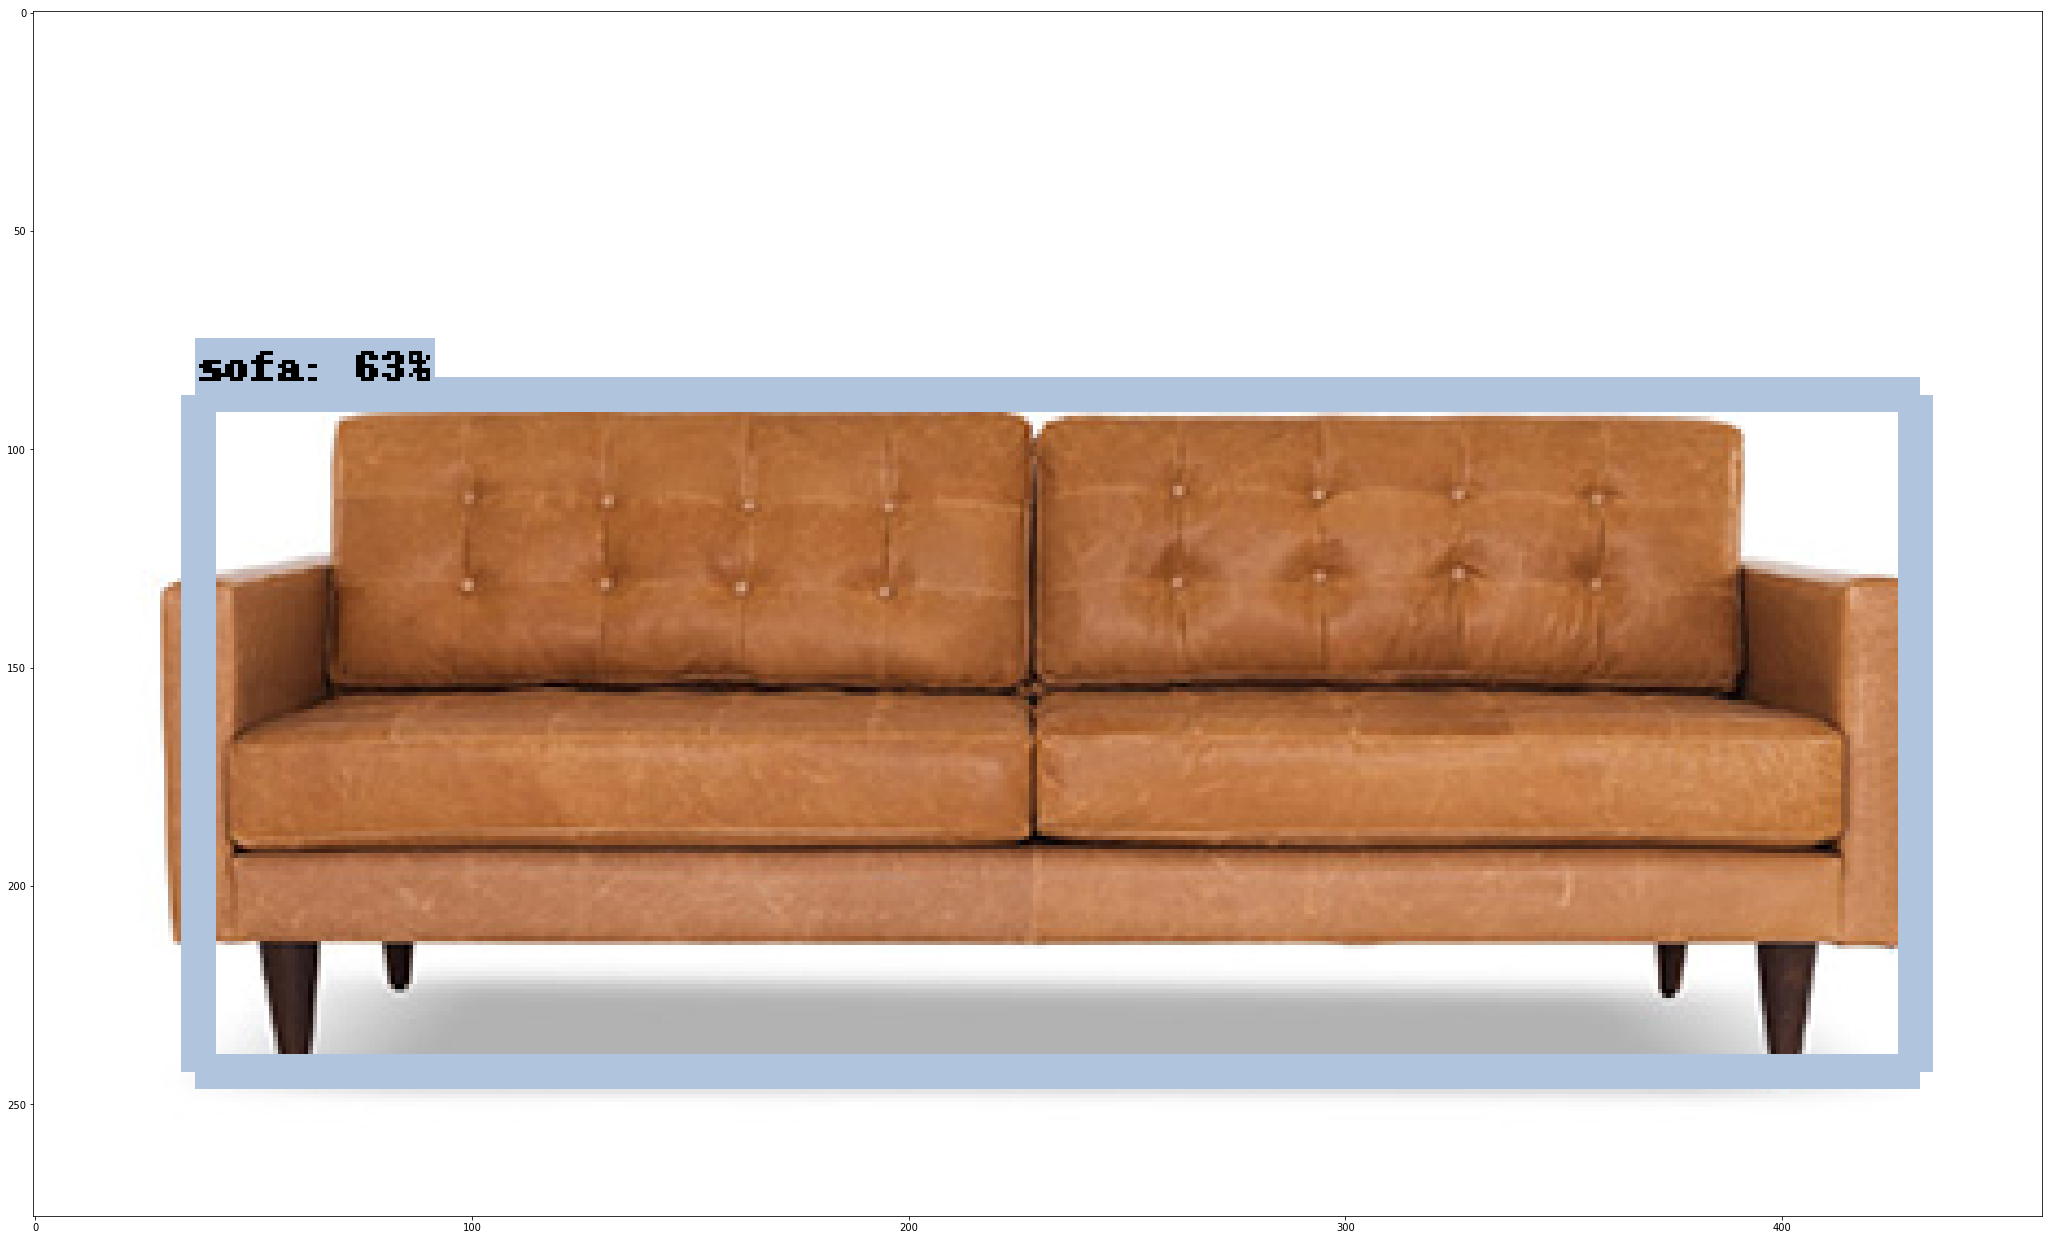

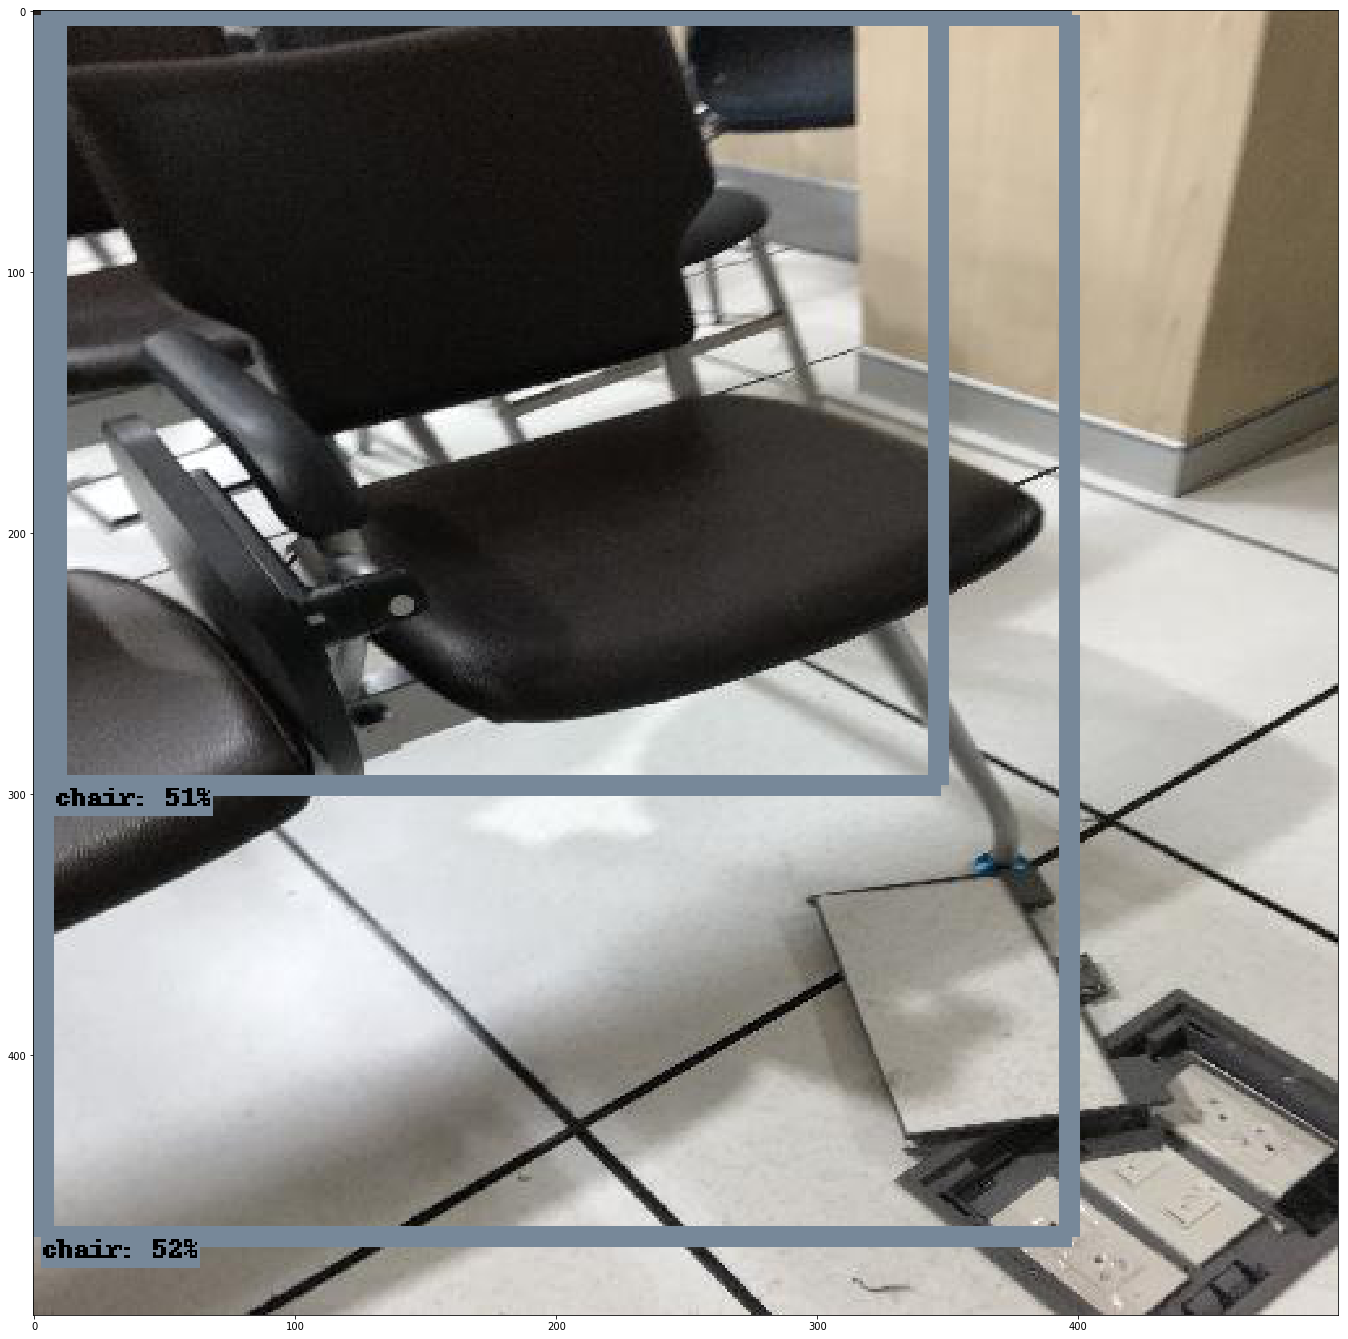

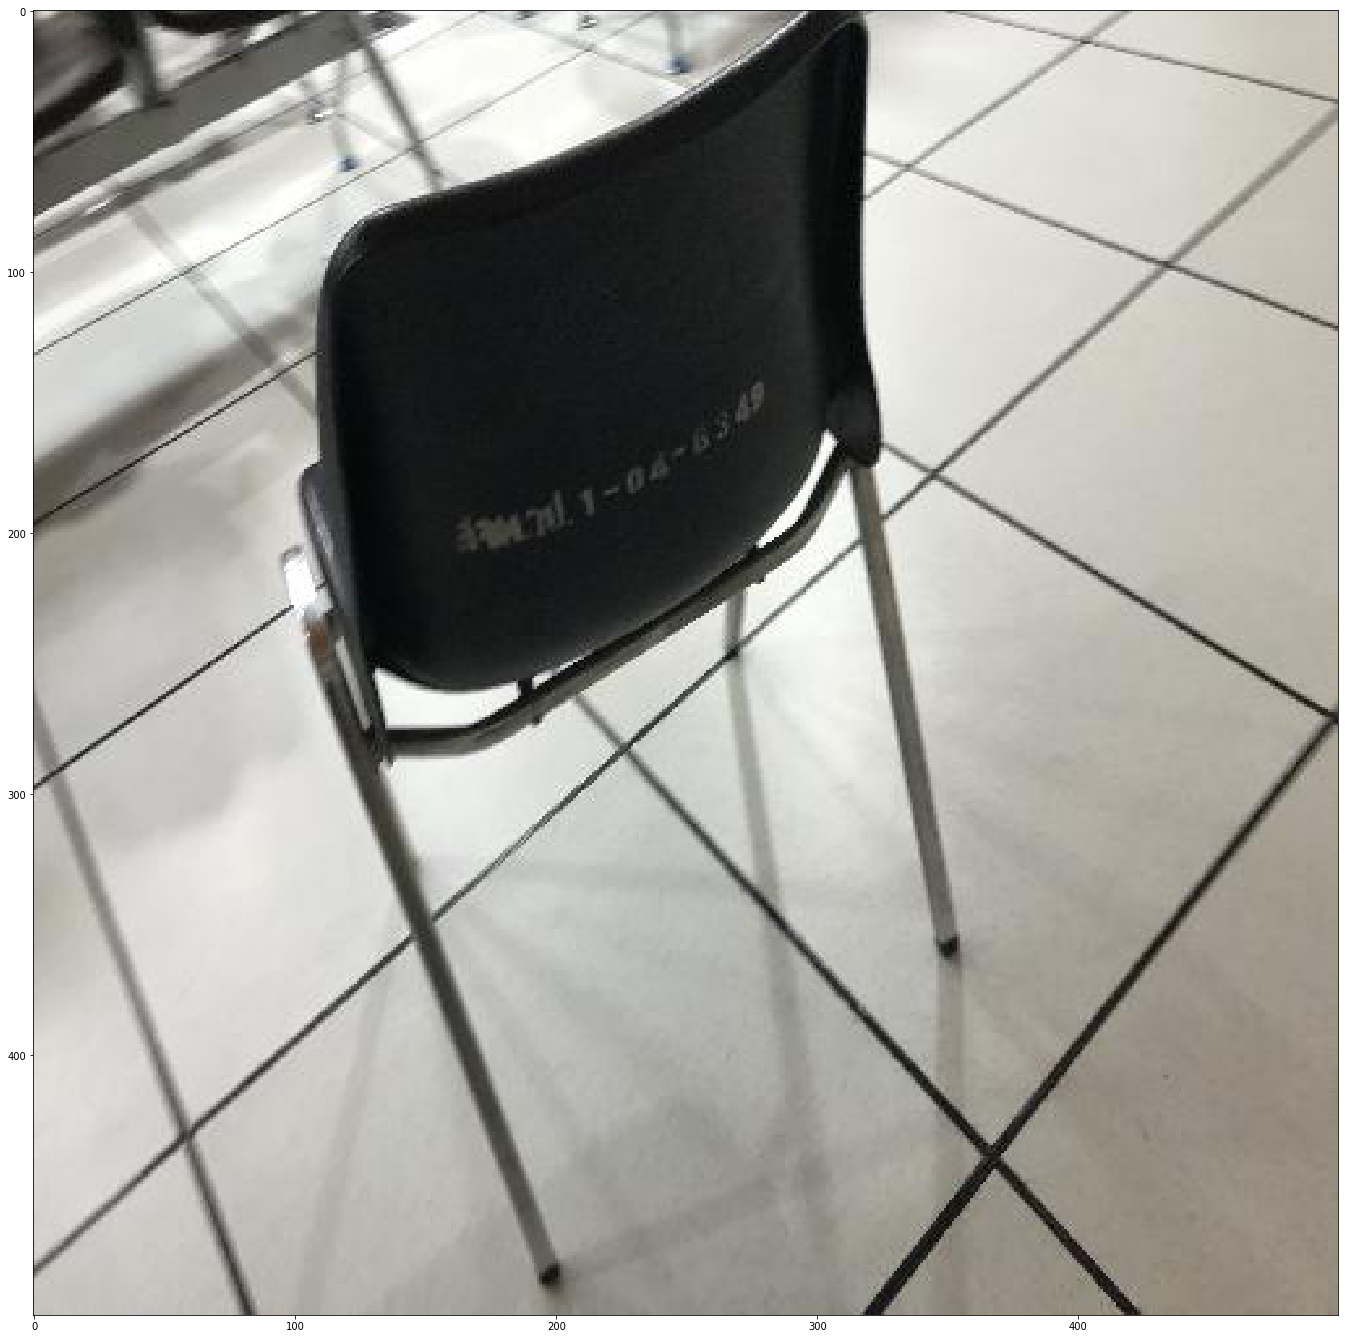

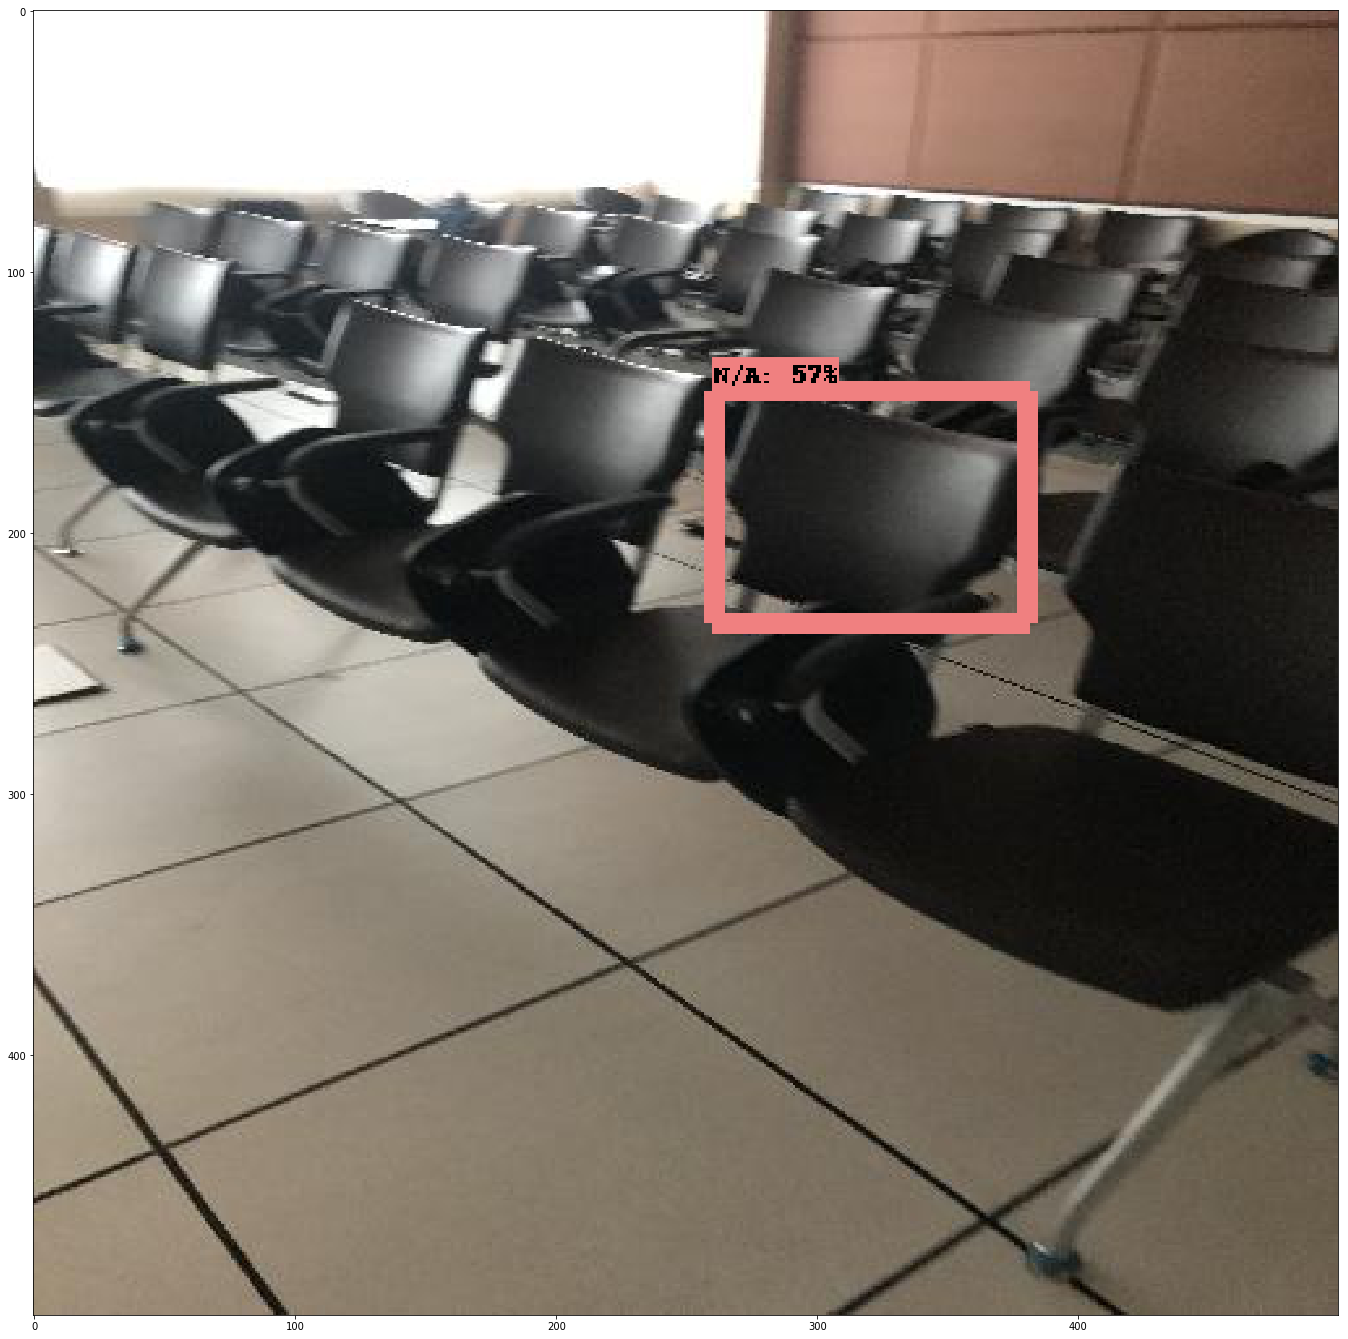

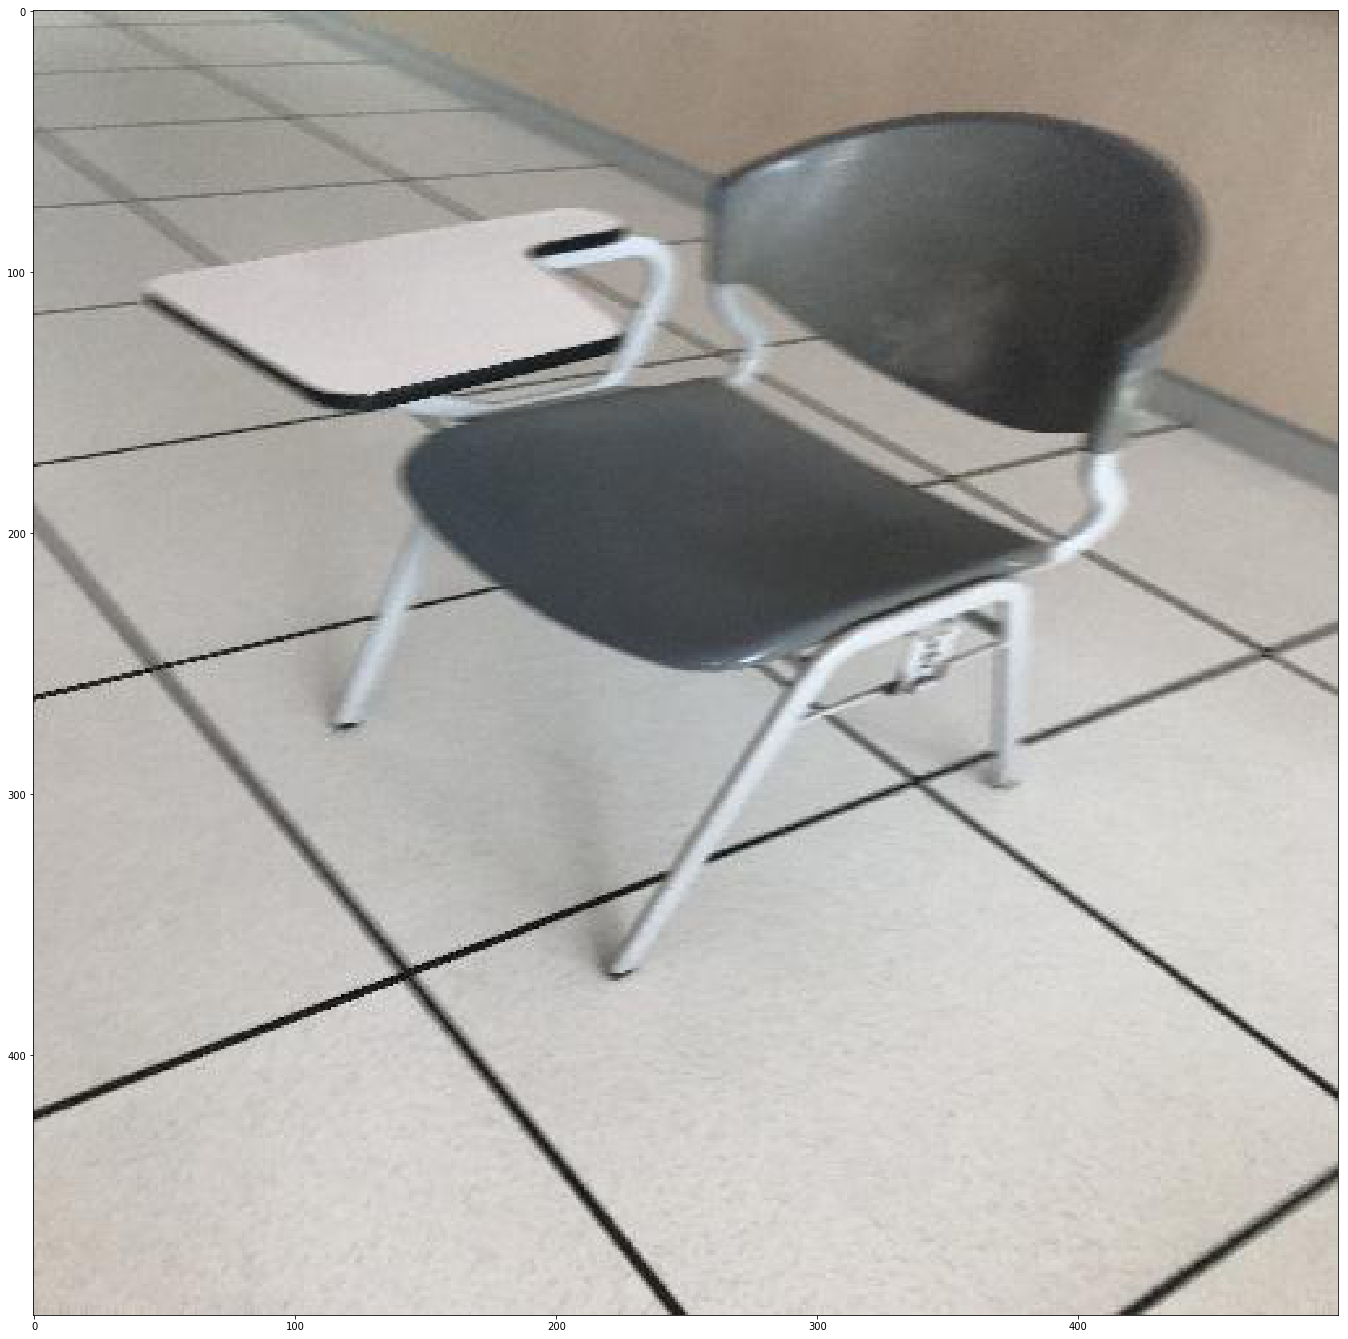

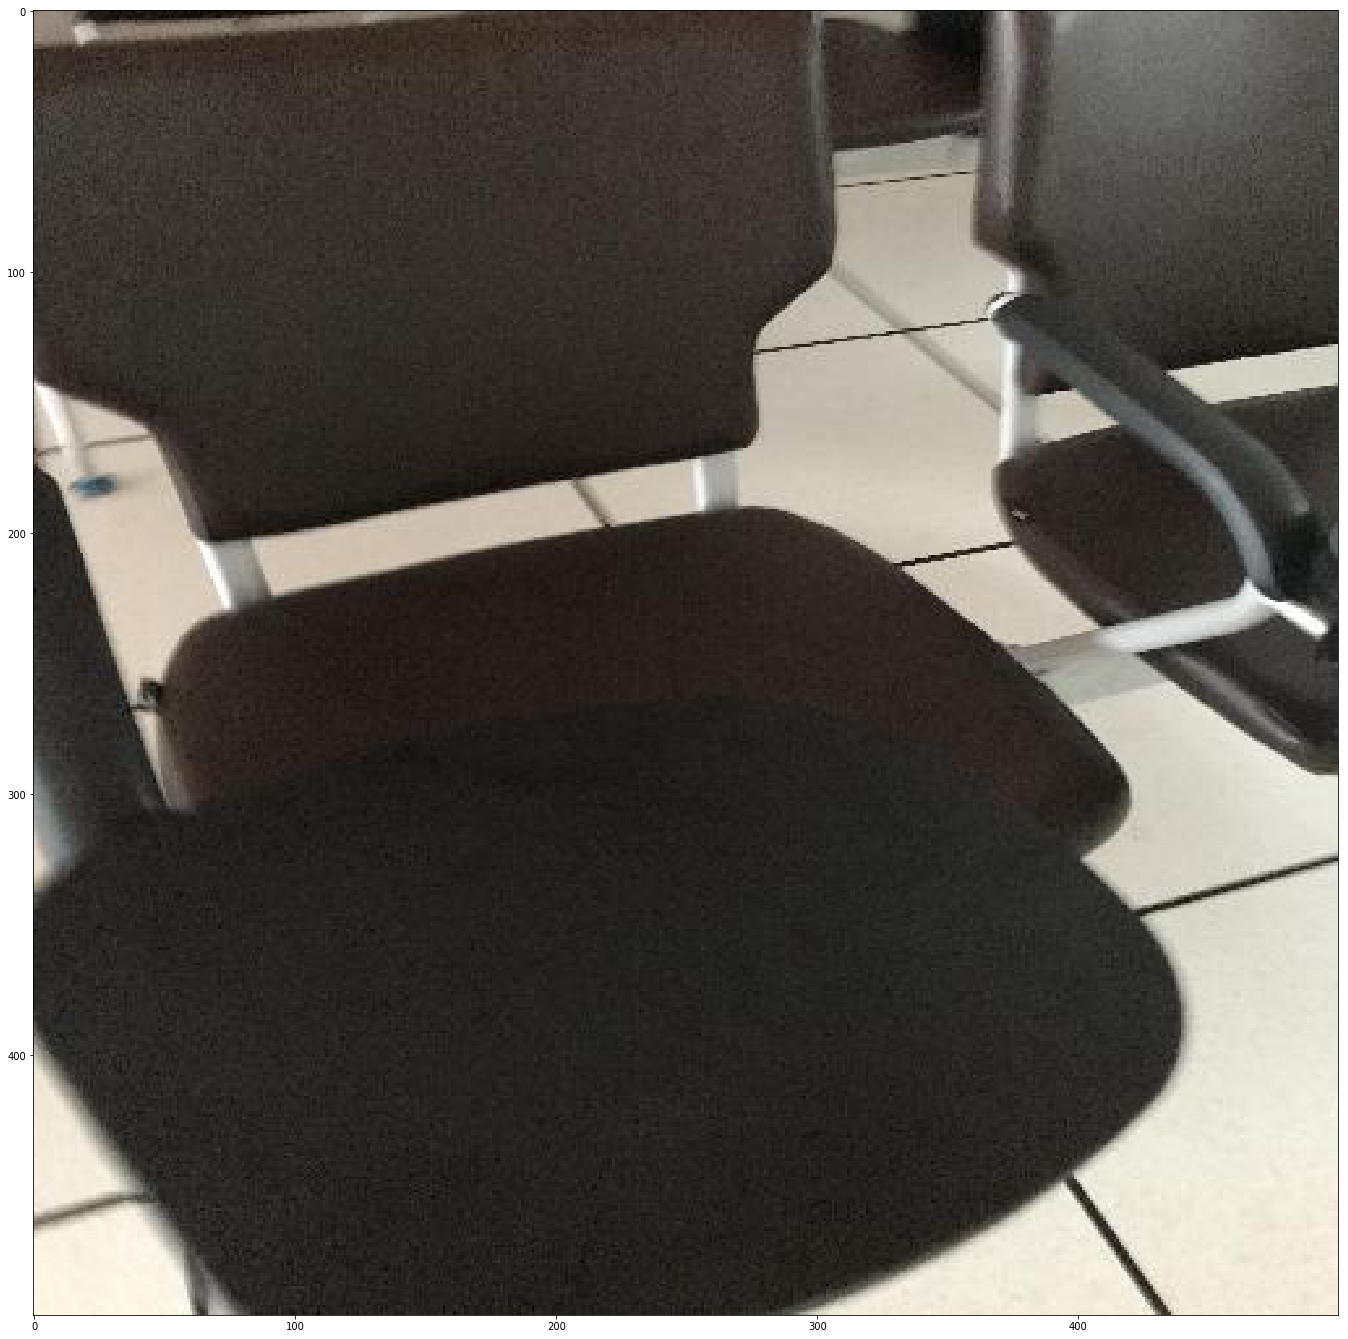

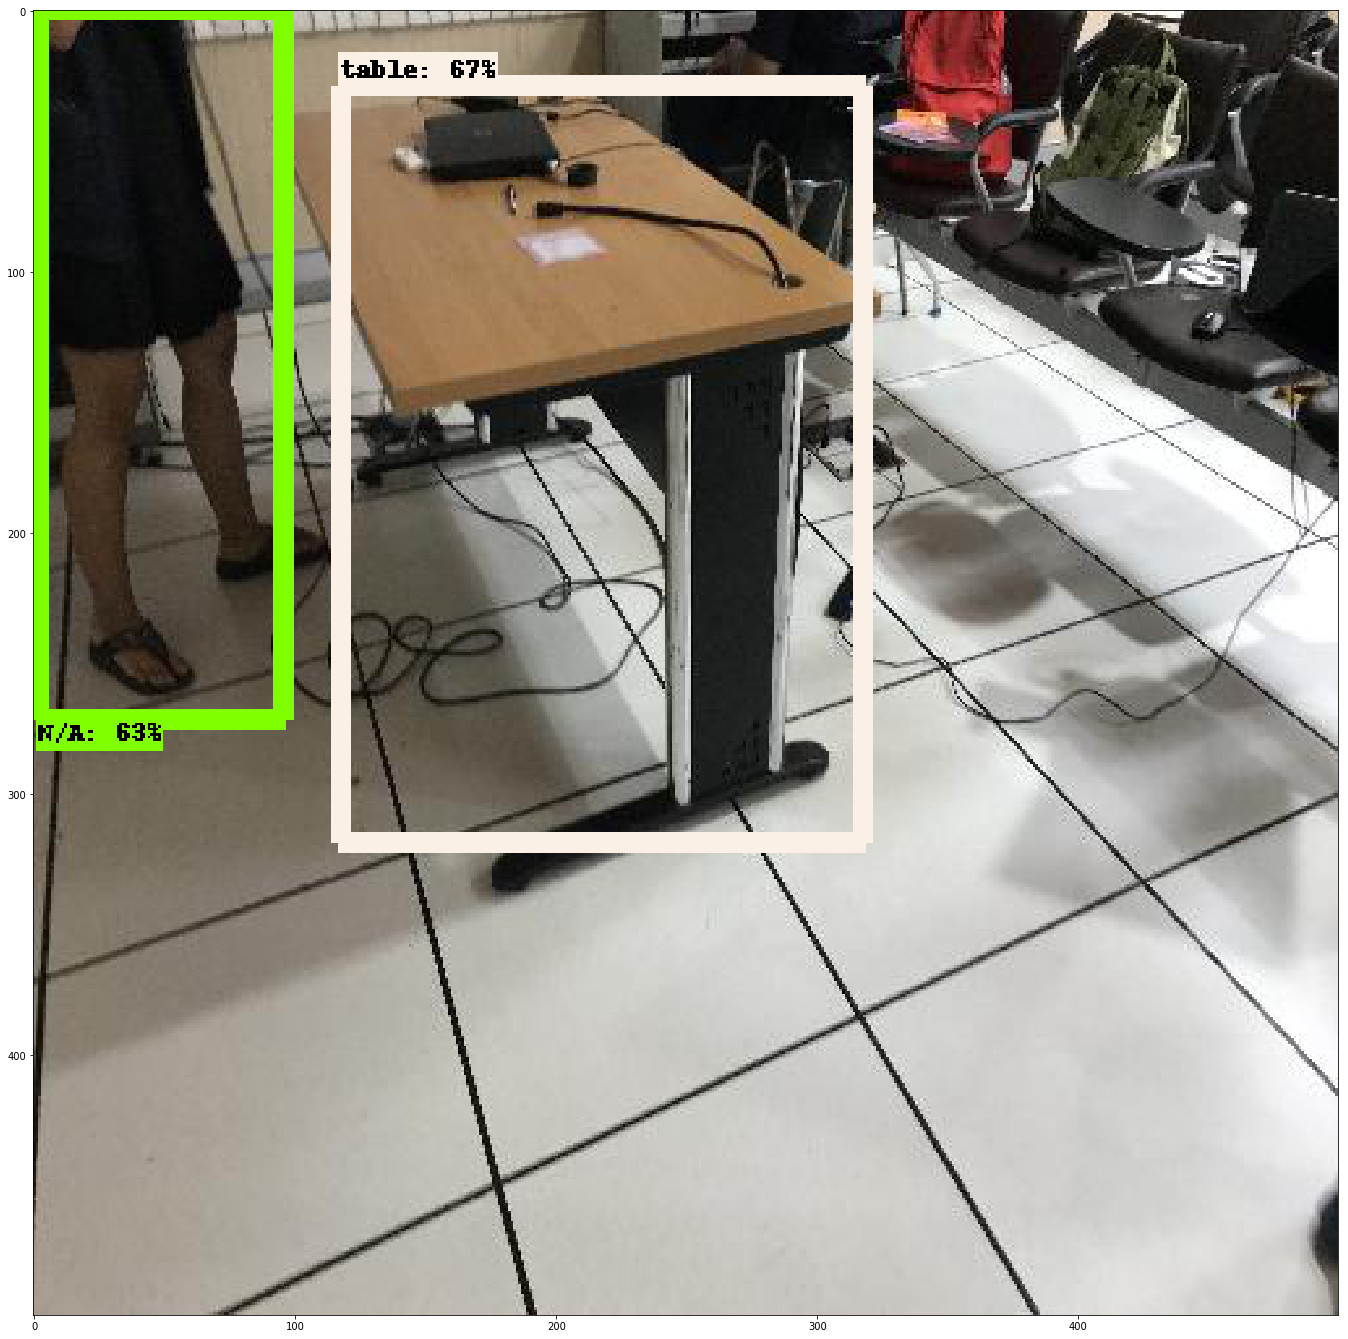

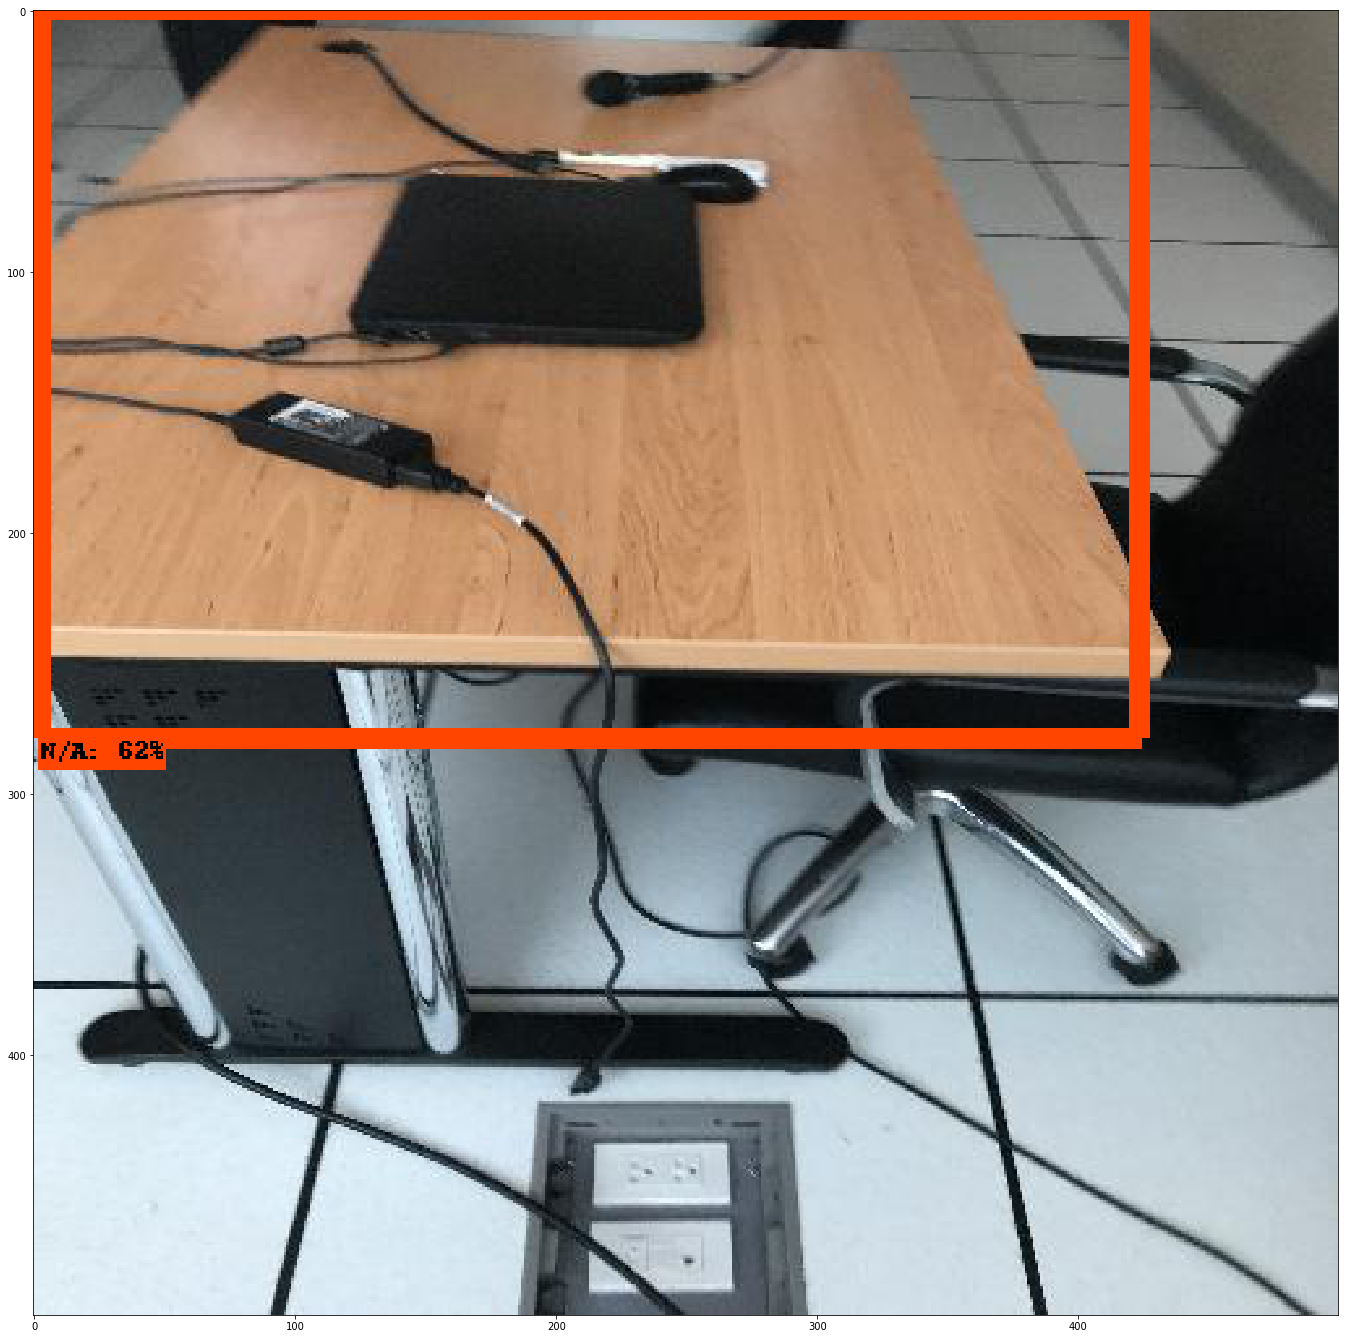

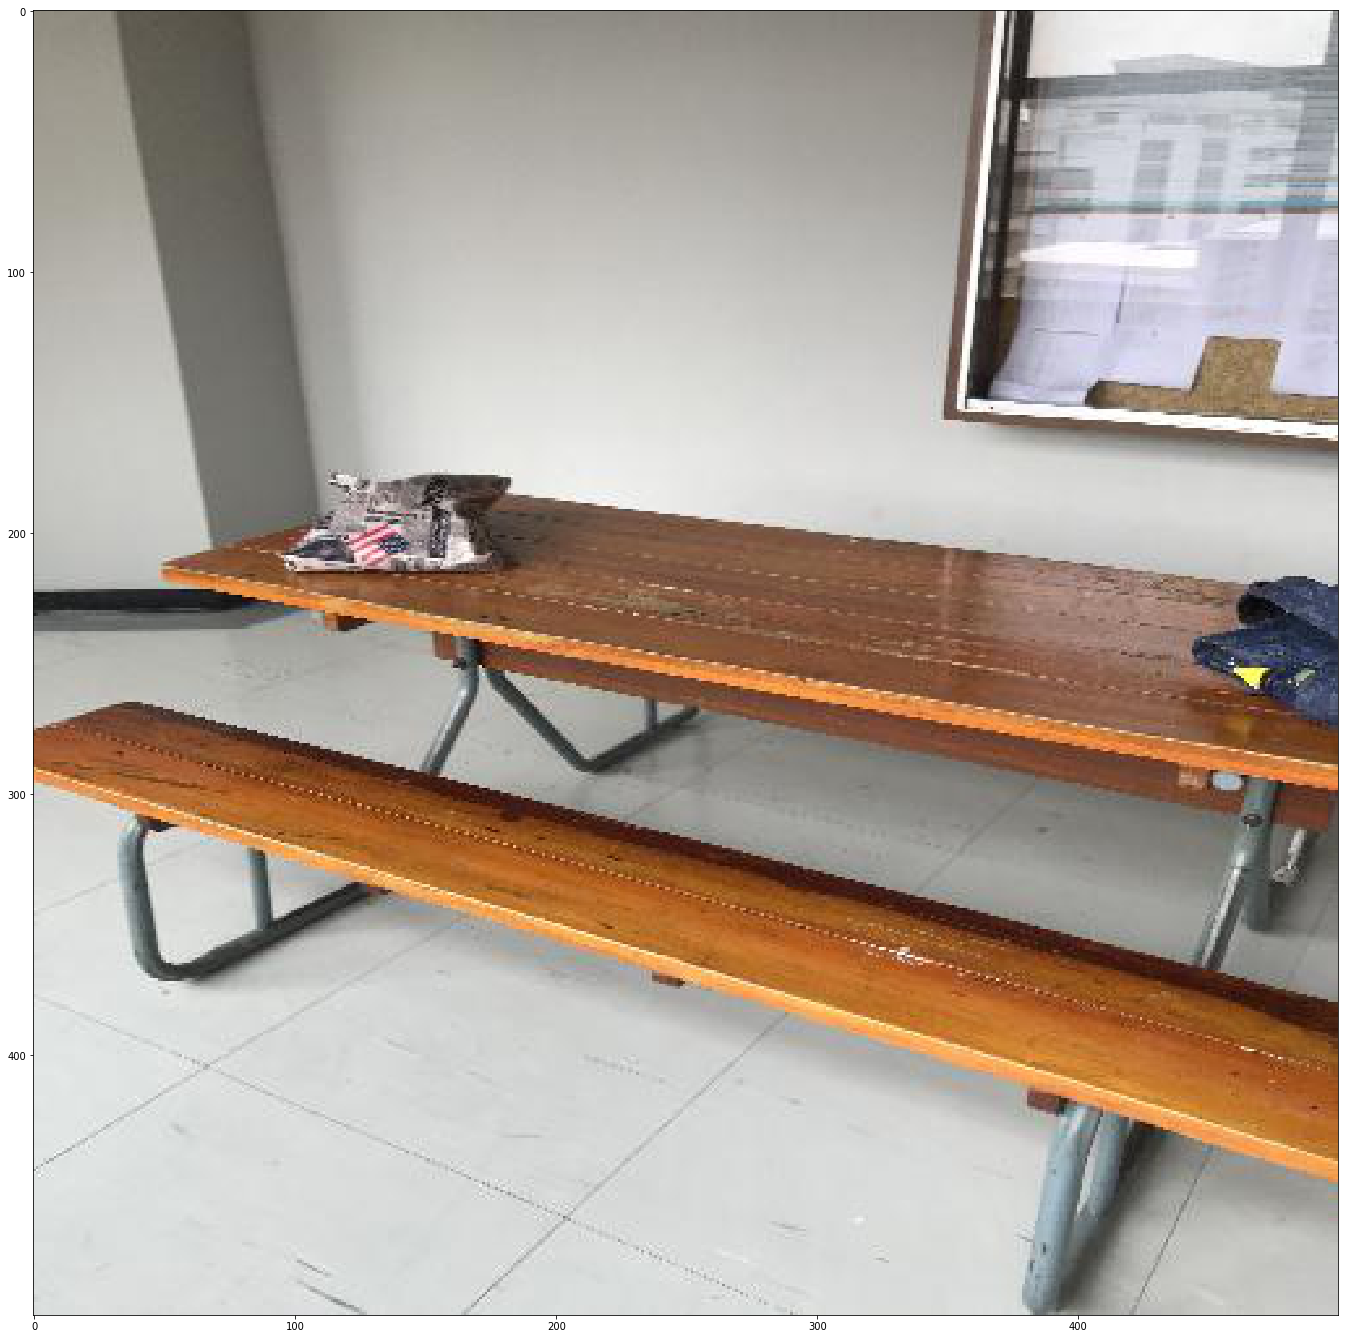

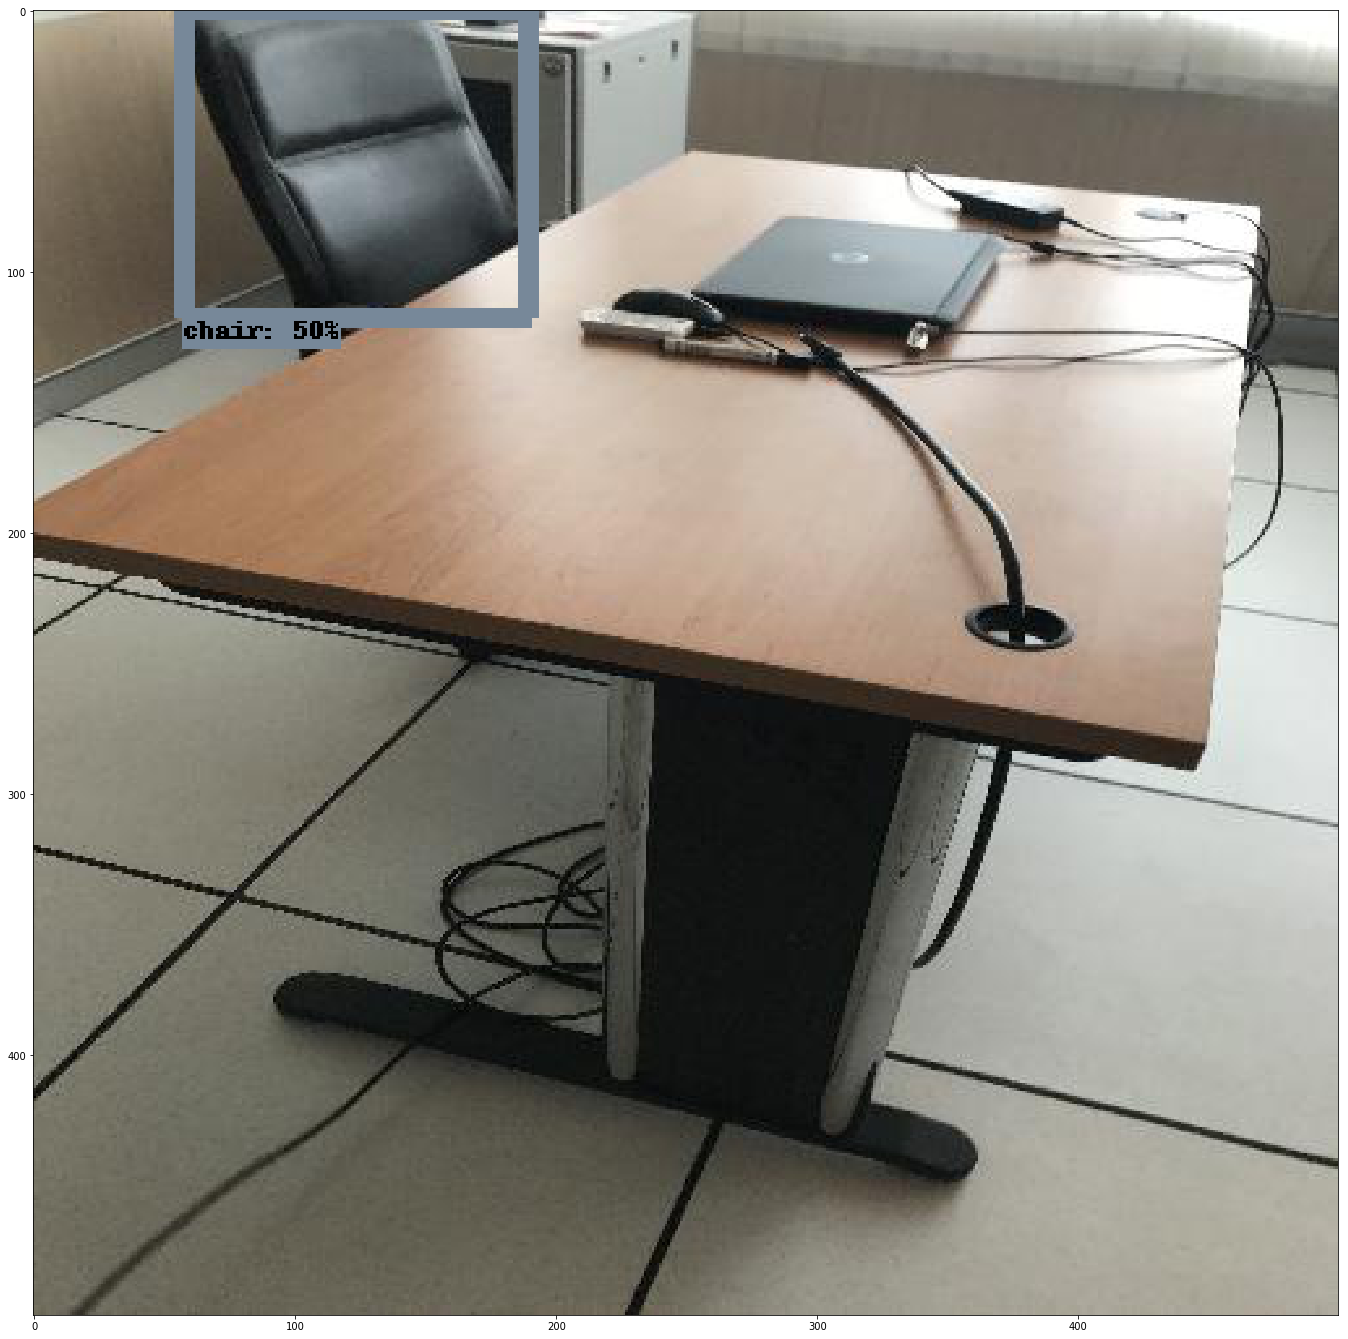

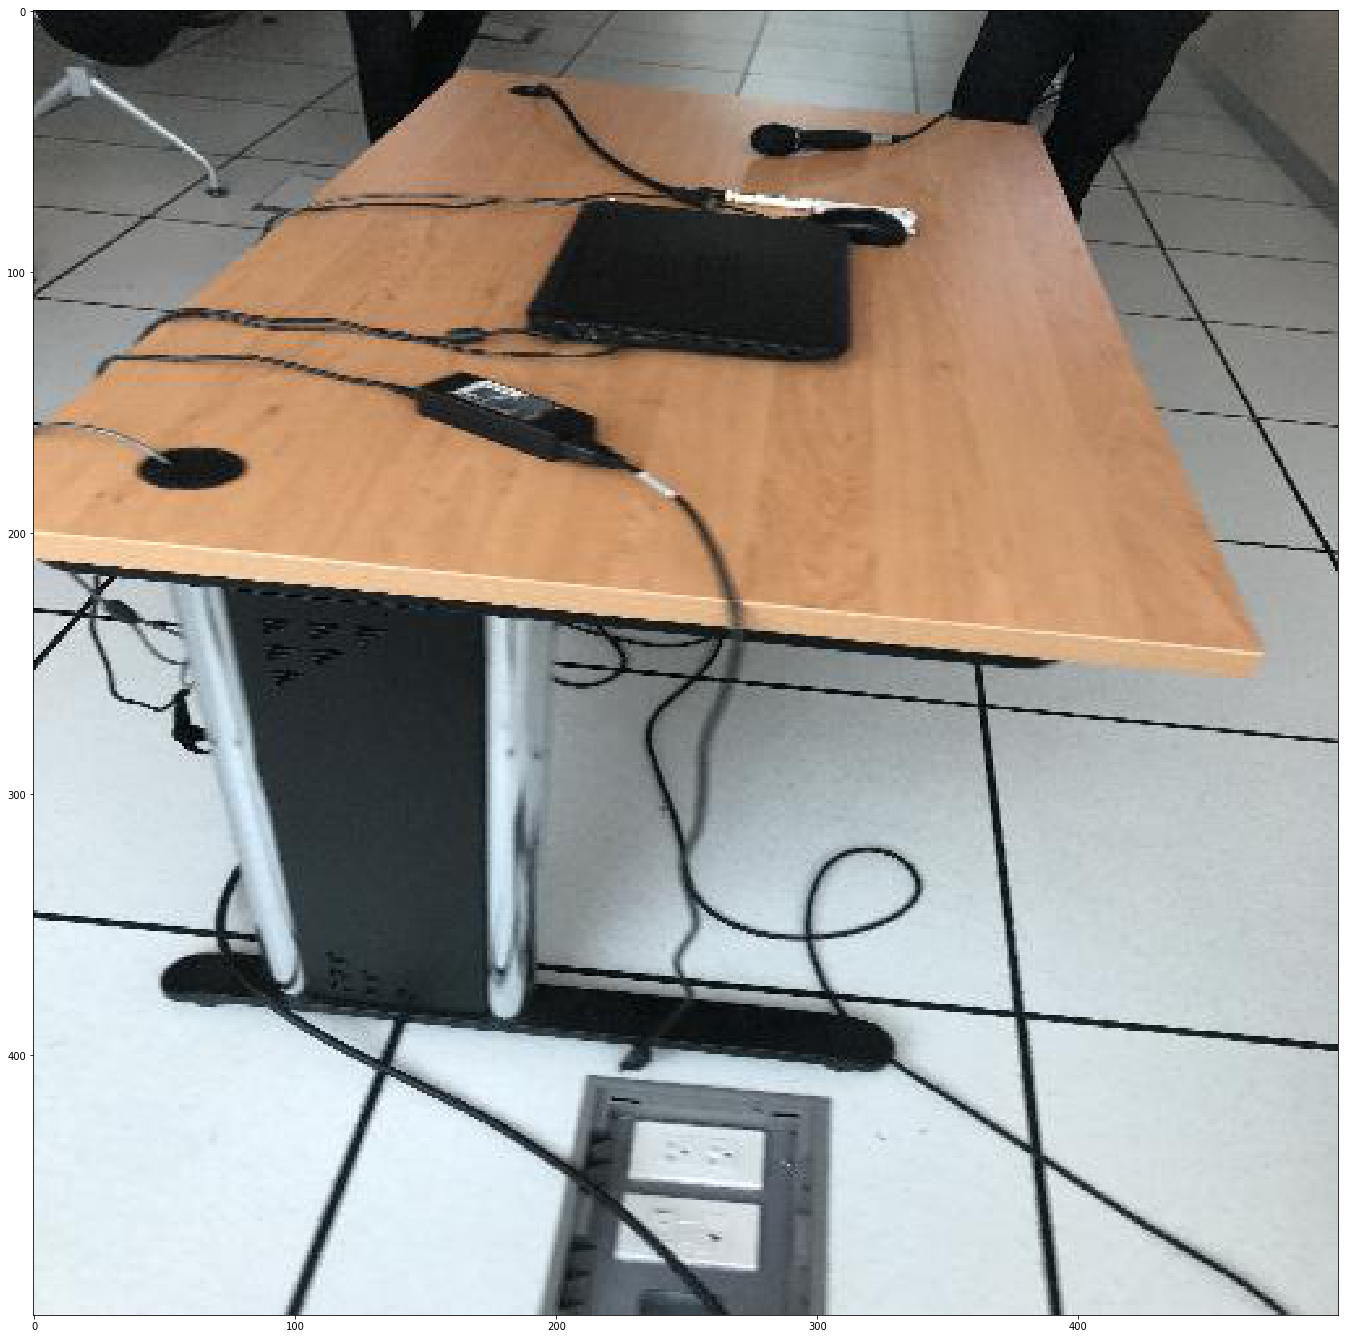

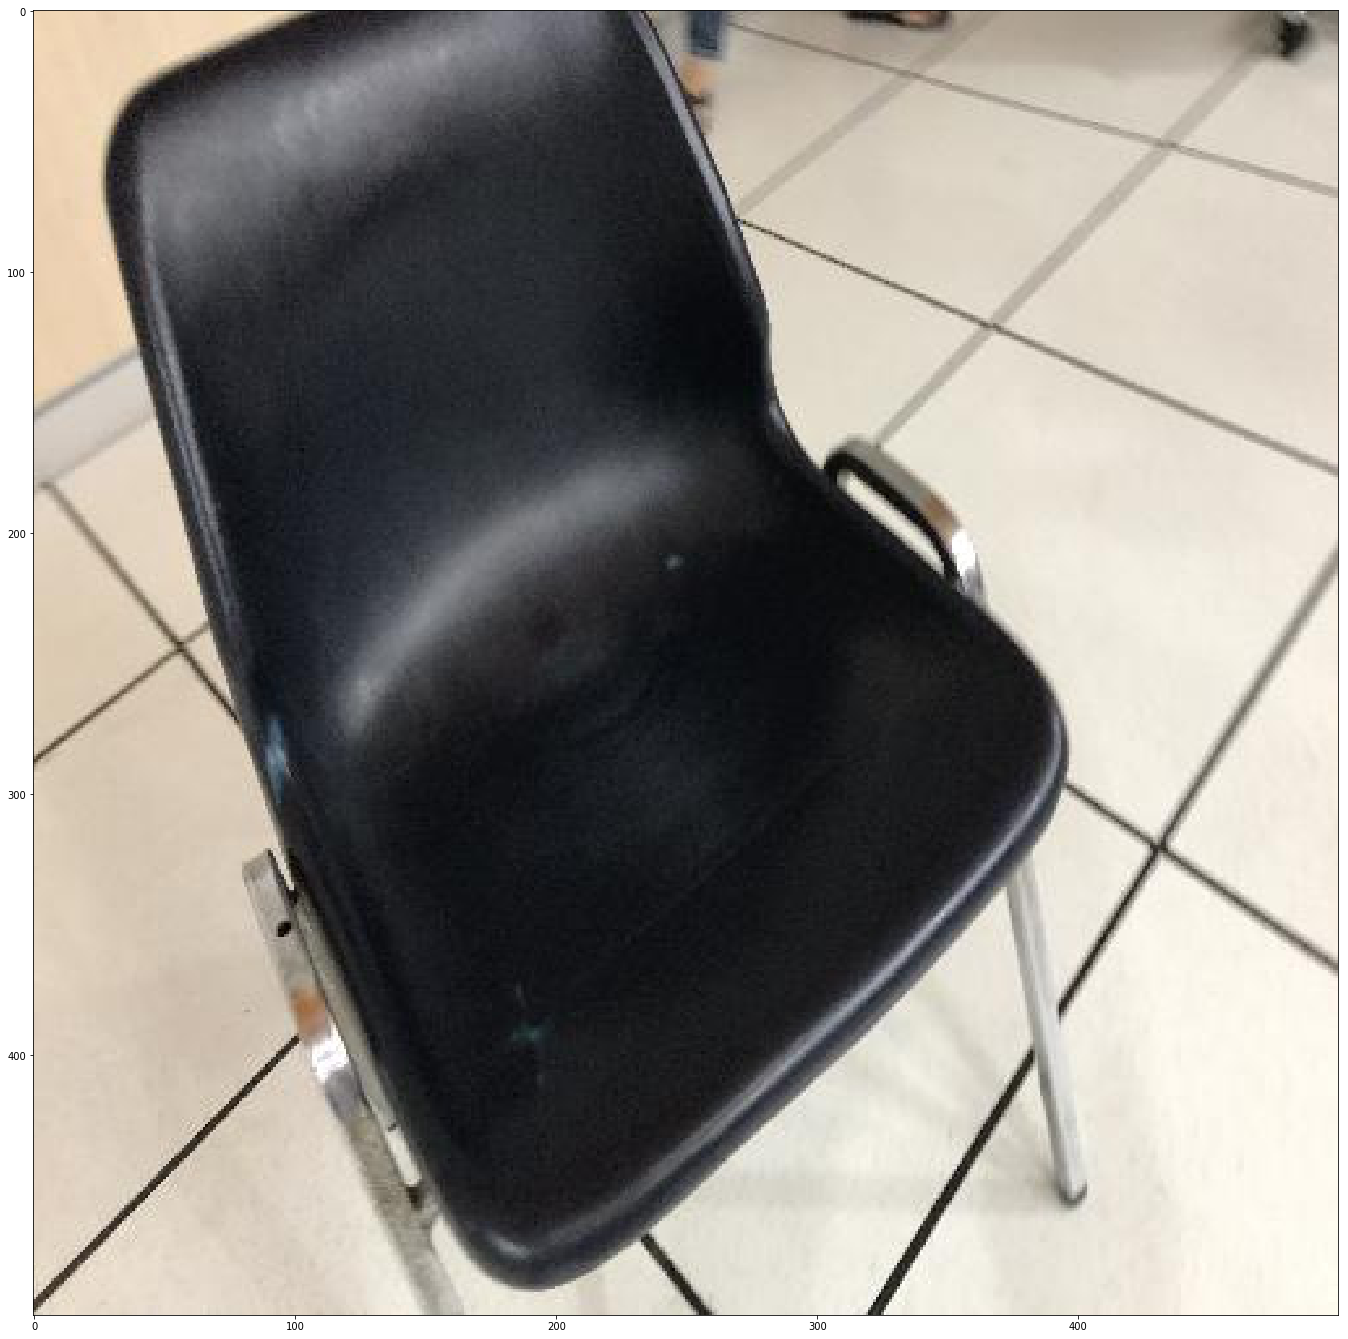

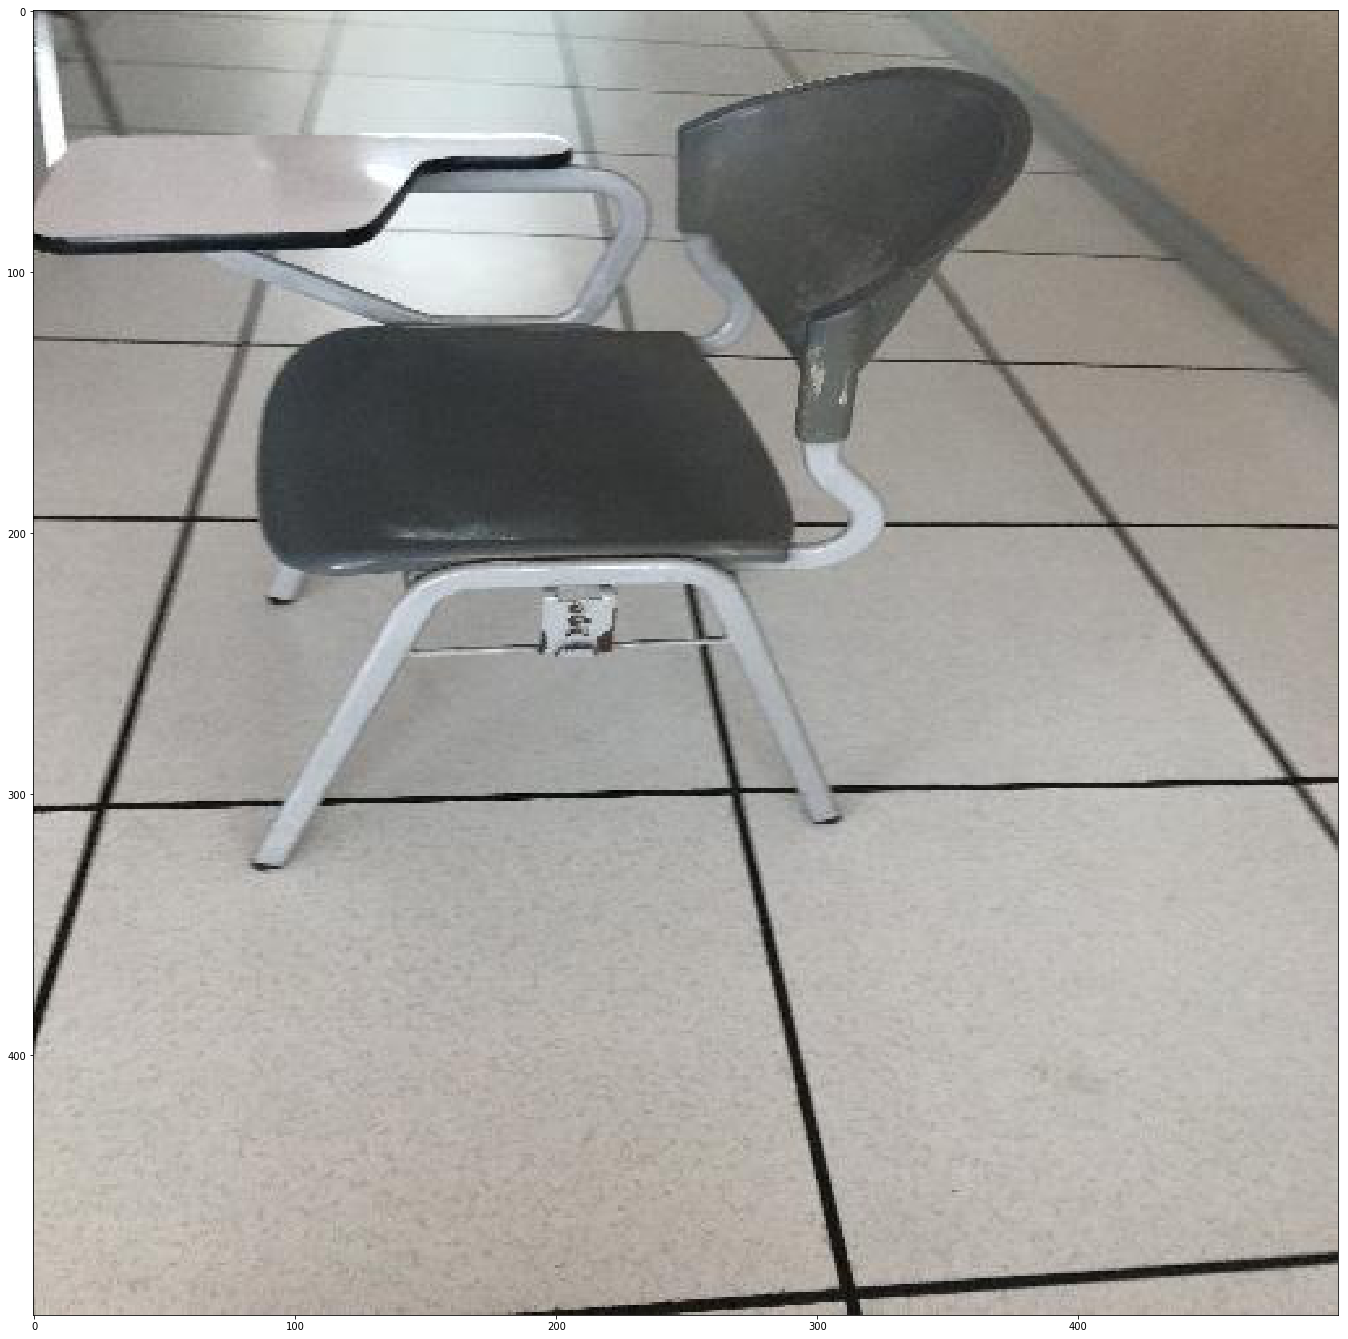

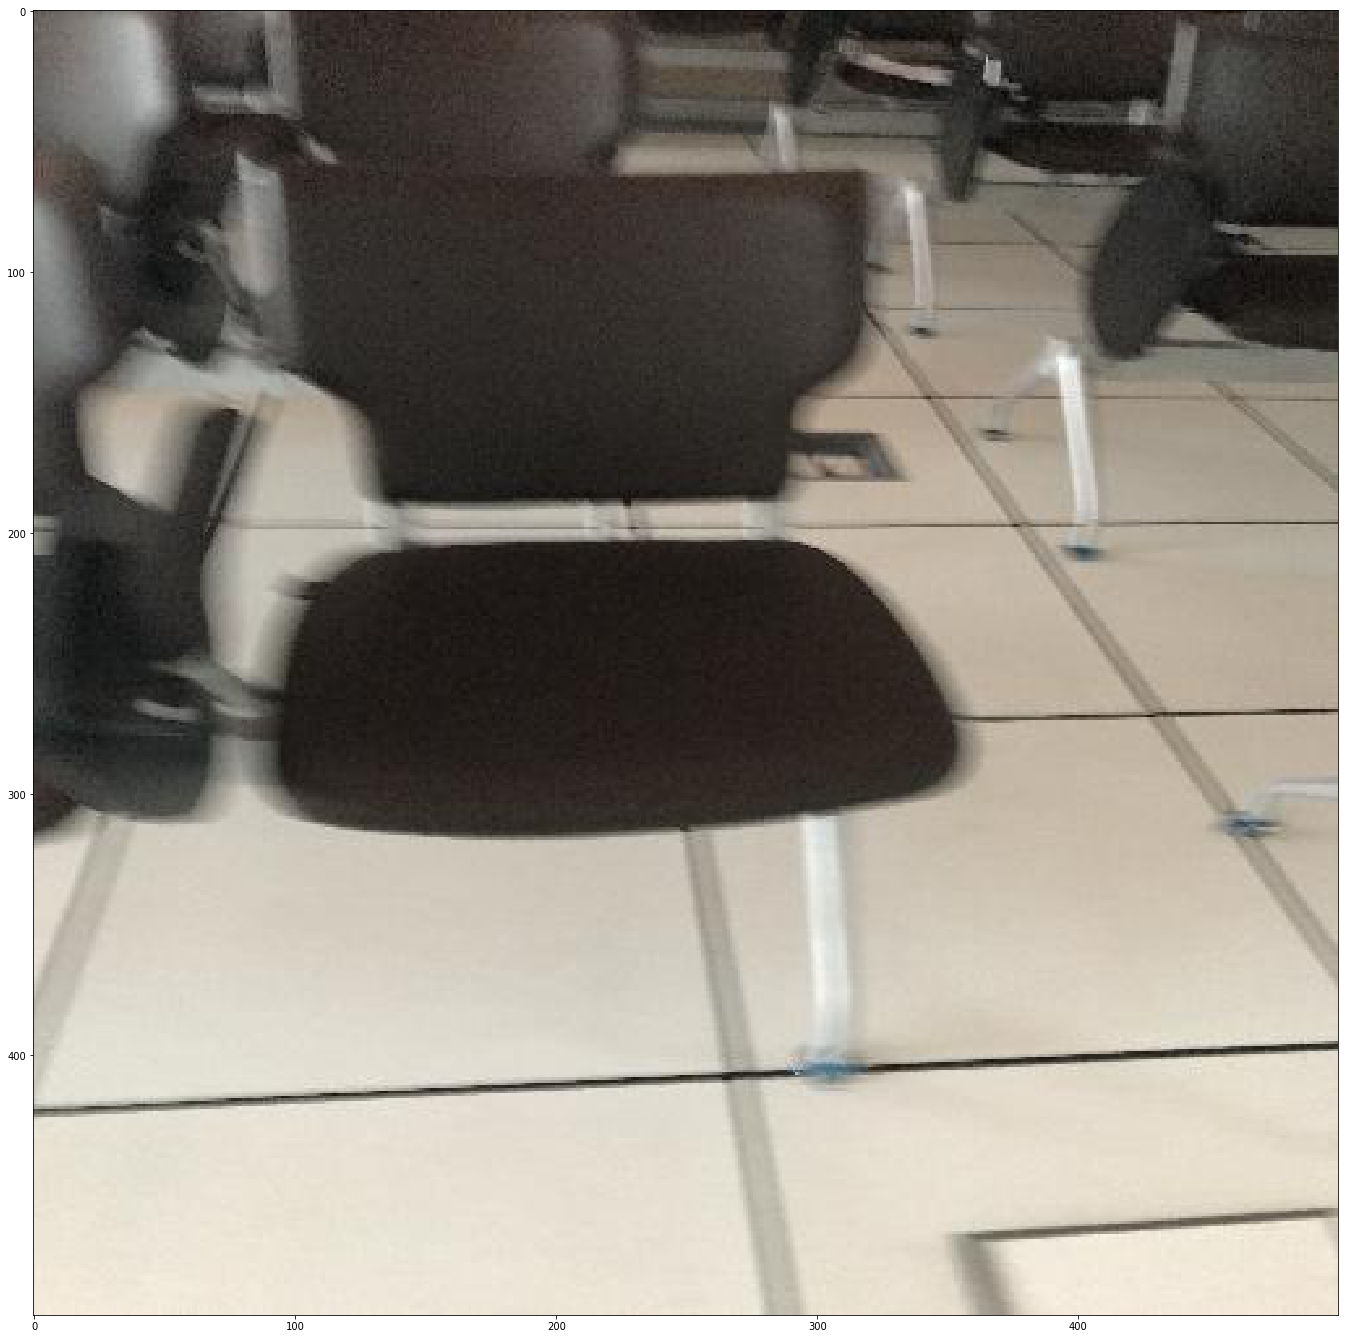

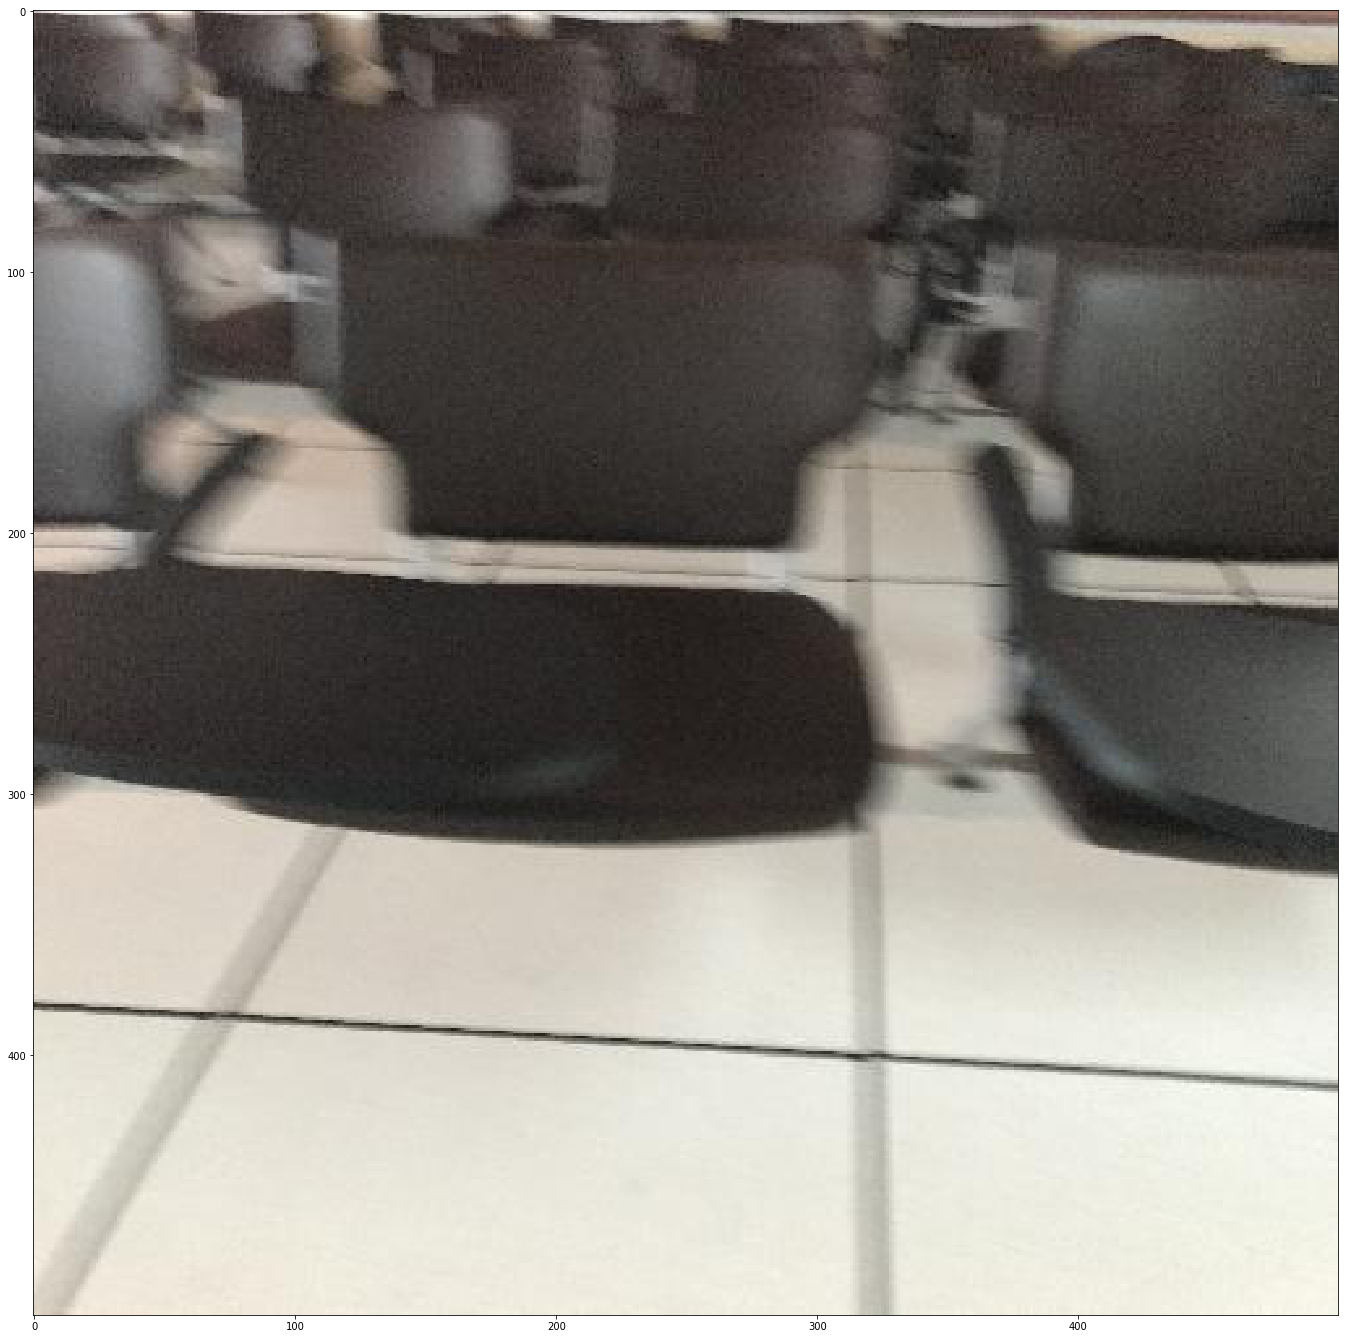

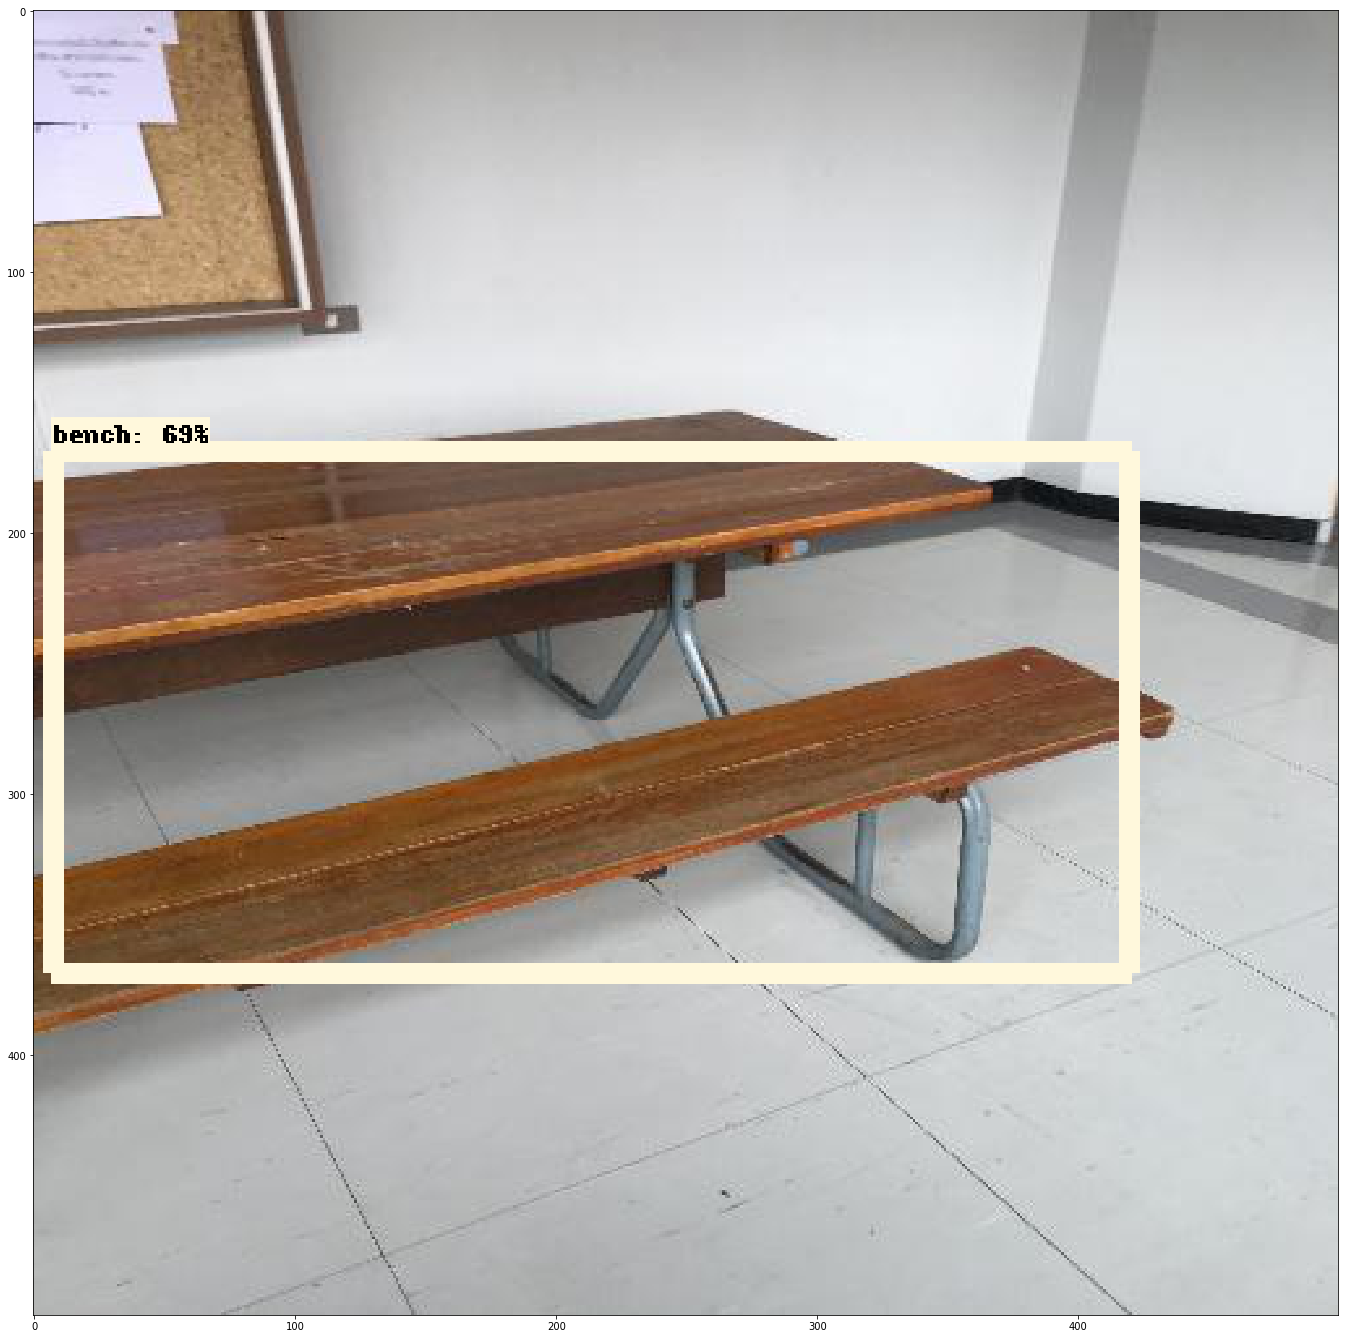

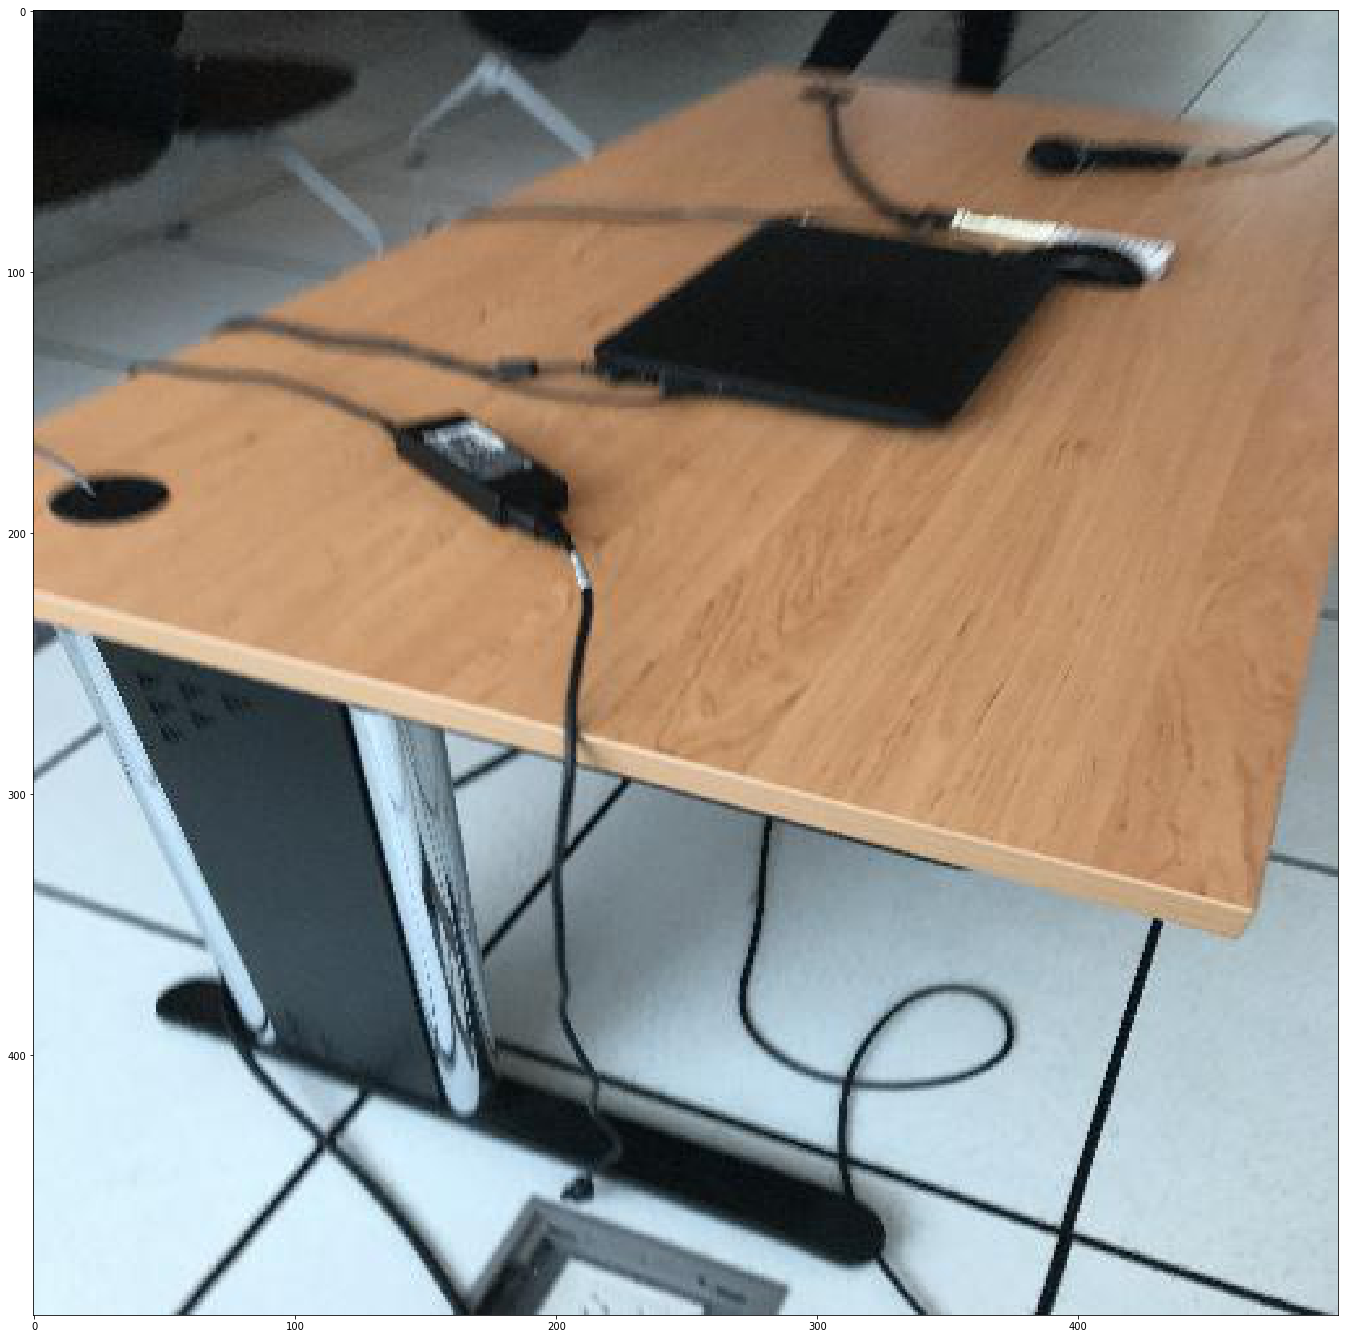

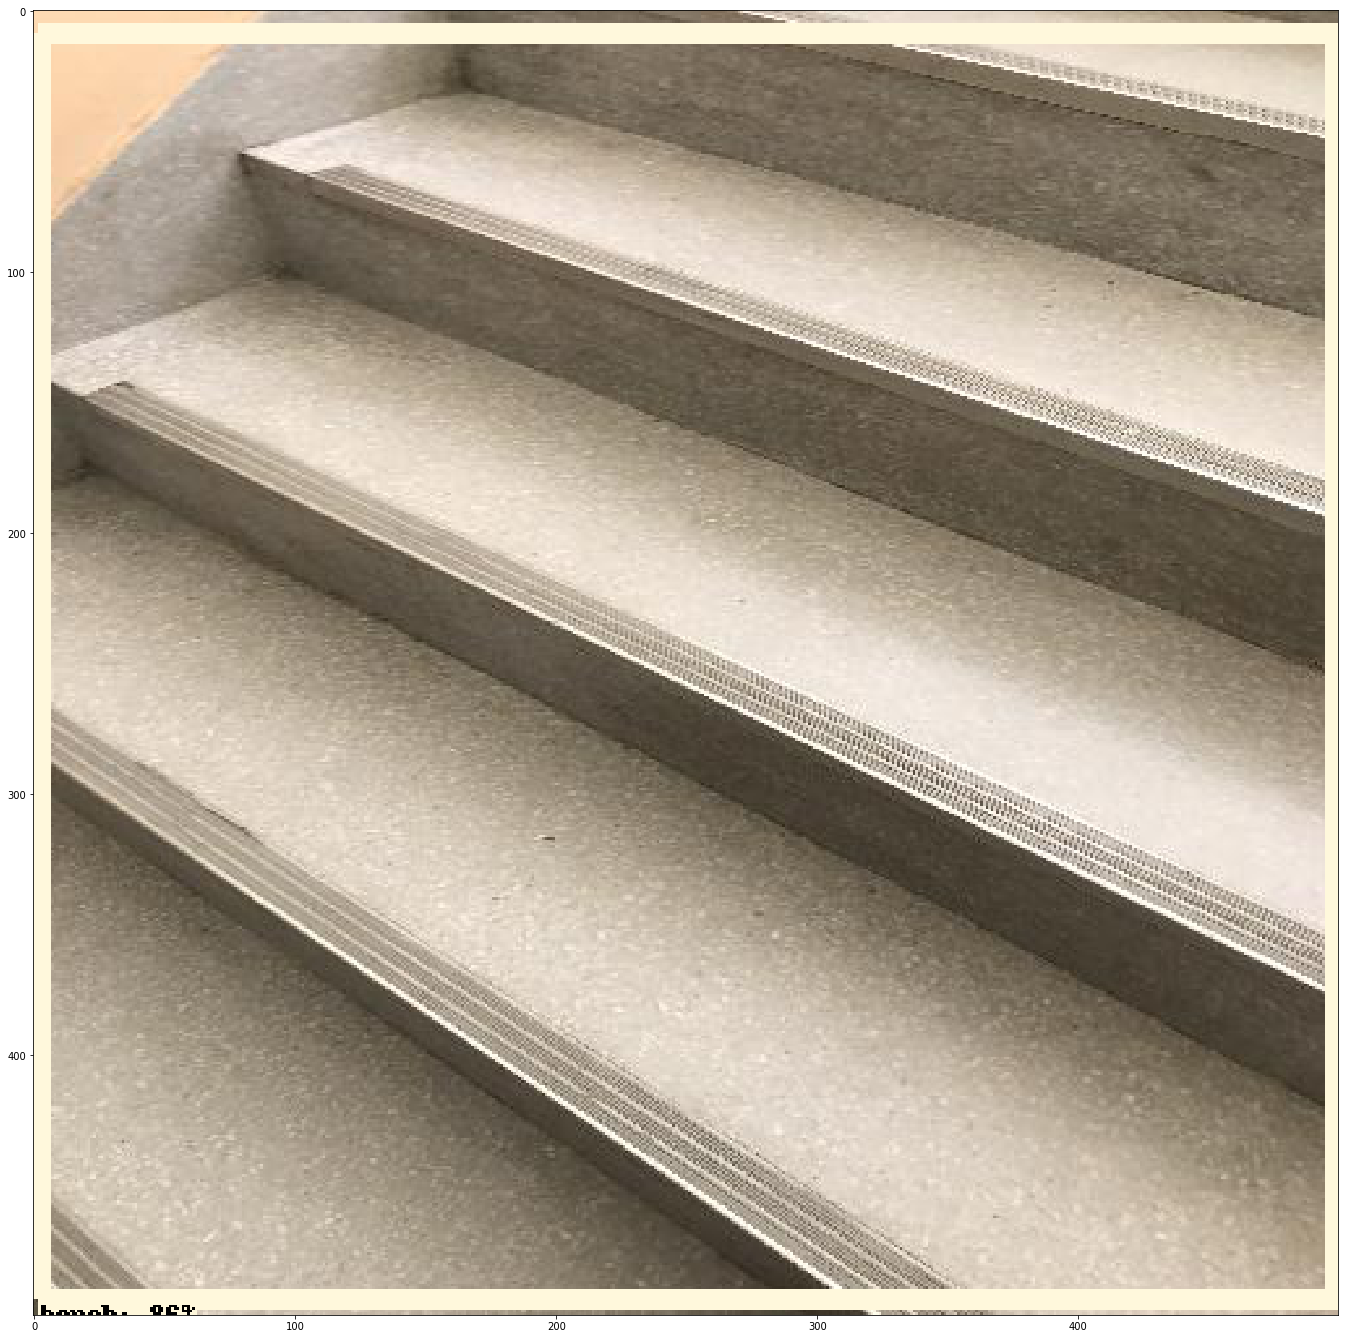

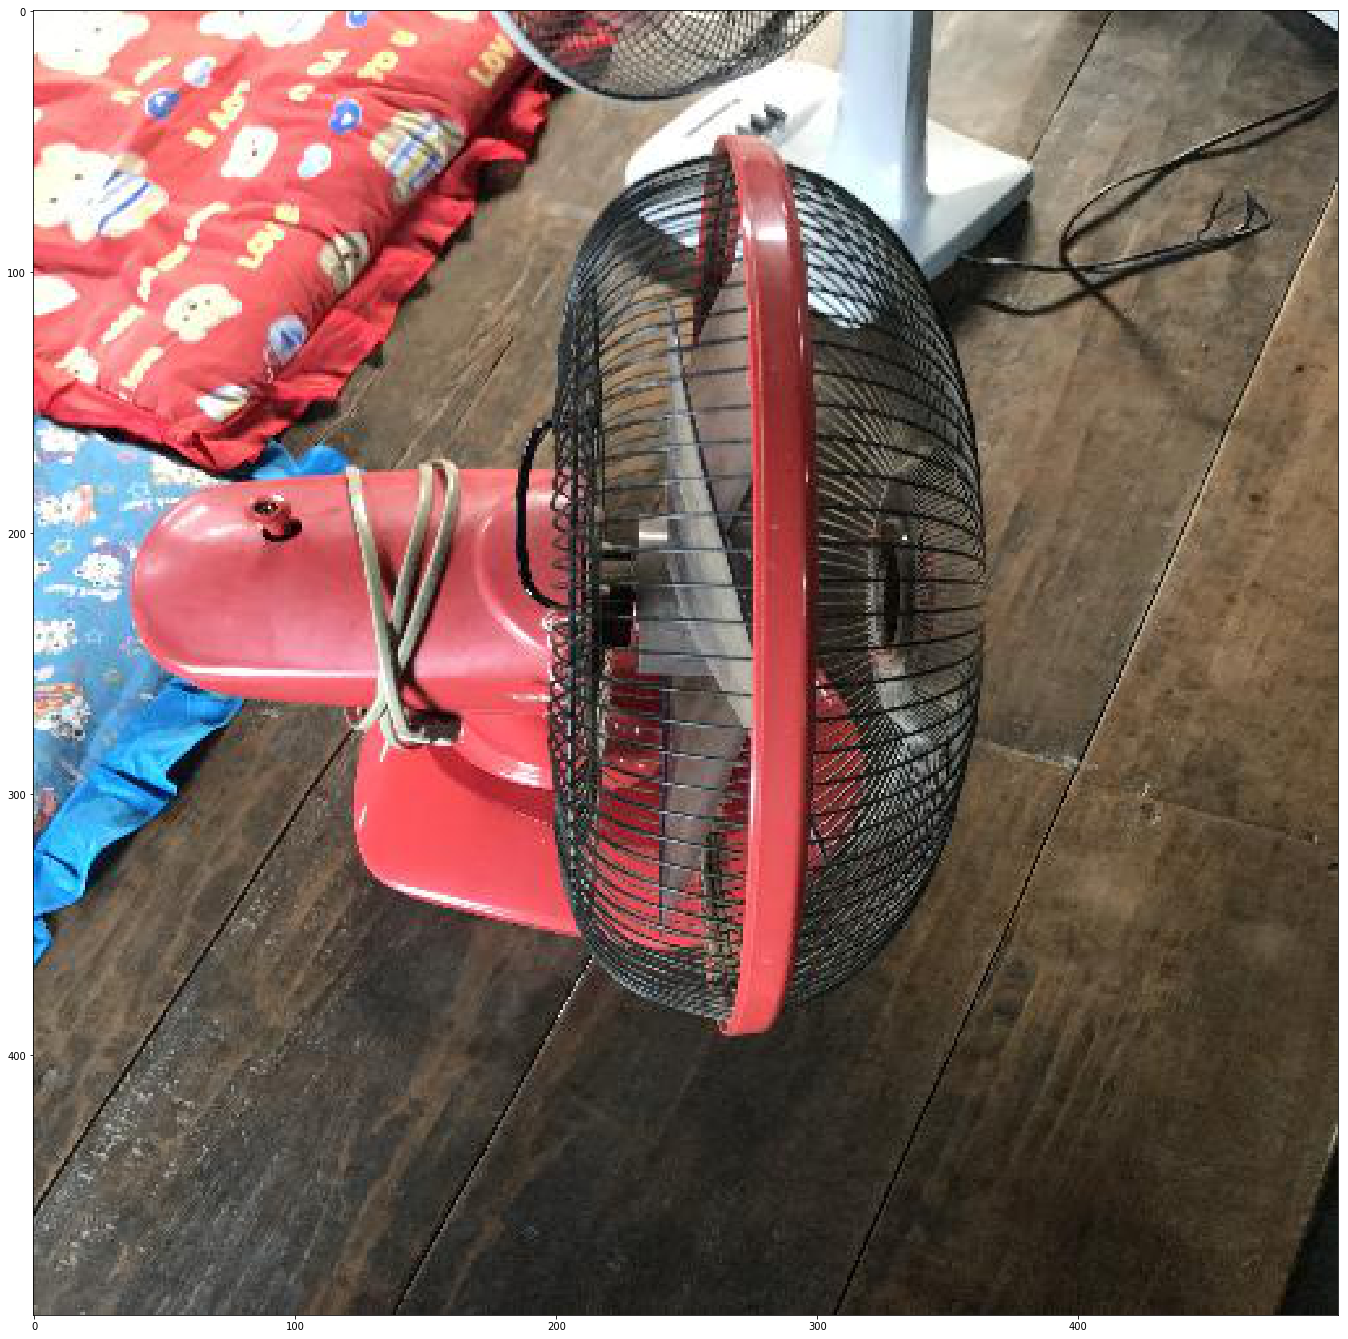

In [27]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      image_np = load_image_into_numpy_array(image)
      image_np_expanded = np.expand_dims(image_np, axis=0)
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)
      print(np.squeeze(classes).astype(np.int32))
      print(np.squeeze(scores))